## Exploratory Data Analysis

In [42]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

plt.rcParams['figure.figsize'] = (10,8)

In [70]:
train = pd.read_csv("train.csv",parse_dates=['date'])
test = pd.read_csv("test.csv",parse_dates=['date'])
samplesub = pd.read_csv("samplesubmission.csv")

In [15]:
train

,ID,date,device,site_latitude,site_longitude,humidity,temp_mean,SulphurDioxide_SO2_column_number_density,SulphurDioxide_SO2_column_number_density_amf,SulphurDioxide_SO2_slant_column_number_density,...,Cloud_cloud_top_height,Cloud_cloud_base_pressure,Cloud_cloud_base_height,Cloud_cloud_optical_depth,Cloud_surface_albedo,Cloud_sensor_azimuth_angle,Cloud_sensor_zenith_angle,Cloud_solar_azimuth_angle,Cloud_solar_zenith_angle,pm2_5
0,ID_JBYXJEUZ8X,2020-03-18,ANQ16PZJ,0.353465,32.560322,0.846844,22.038542,-0.000138,1.042629,-0.000143,...,4181.792969,69589.453125,3181.793457,7.799846,0.278111,76.618553,9.970293,-93.110069,19.214193,63.853333
1,ID_PEJJNLBUPR,2019-10-13,AB6051M4,0.390741,32.582257,0.874493,21.545833,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,32.507083
2,ID_21L8UZQO1T,2019-12-21,A0WN66FH,0.285751,32.578325,0.729340,23.568655,NaN,NaN,NaN,...,4440.391113,67341.109375,3440.390869,62.496590,0.416631,-97.300758,63.690605,-127.856804,40.857922,80.290833
3,ID_GNW2G8J4T8,2020-02-20,aq_41,-1.244985,29.989236,0.919271,16.338542,-0.000111,0.750228,-0.000083,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,42.601687
4,ID_4XOX2V6SK0,2019-04-17,aq_41,-1.244985,29.989236,0.858365,16.602083,-0.000127,0.792634,-0.000101,...,4842.057488,64347.788635,3842.057585,4.971117,0.277157,74.786025,32.583070,-57.273638,21.864529,89.642229
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9918,ID_E2O117AYG3,2020-07-20,APZ80RTM,0.306666,32.608550,0.736872,22.965972,NaN,NaN,NaN,...,7156.016834,48356.941077,6156.016834,3.419584,0.235853,72.847686,50.858546,-31.908548,24.023105,69.690417
9919,ID_8CJG37XAYN,2020-02-23,aq_60,0.307780,32.651449,0.721721,26.555392,-0.000684,0.414260,-0.000283,...,13266.058594,20344.134766,12266.058594,10.198909,0.284046,-97.272919,64.089607,-109.482361,32.003708,47.470518
9920,ID_NTRI2J528O,2020-04-17,AJCK5L86,0.343898,32.587226,0.810413,22.915625,NaN,NaN,NaN,...,7754.737305,44284.785156,6754.737305,5.724823,0.299491,-98.203743,53.532288,-70.173080,32.261959,43.237917
9921,ID_IBH41YUMOZ,2020-06-08,aq_76,0.357987,32.584100,0.876437,21.258333,NaN,NaN,NaN,...,6357.190430,53044.425781,5357.190430,49.711514,0.279414,71.634727,61.877548,-26.566027,25.409733,25.599925


In [8]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9923 entries, 0 to 9922
Data columns (total 71 columns):
 #   Column                                                    Non-Null Count  Dtype         
---  ------                                                    --------------  -----         
 0   ID                                                        9923 non-null   object        
 1   date                                                      9923 non-null   datetime64[ns]
 2   device                                                    9923 non-null   object        
 3   site_latitude                                             9923 non-null   float64       
 4   site_longitude                                            9923 non-null   float64       
 5   humidity                                                  9923 non-null   float64       
 6   temp_mean                                                 9903 non-null   float64       
 7   SulphurDioxide_SO2_column_number_density  

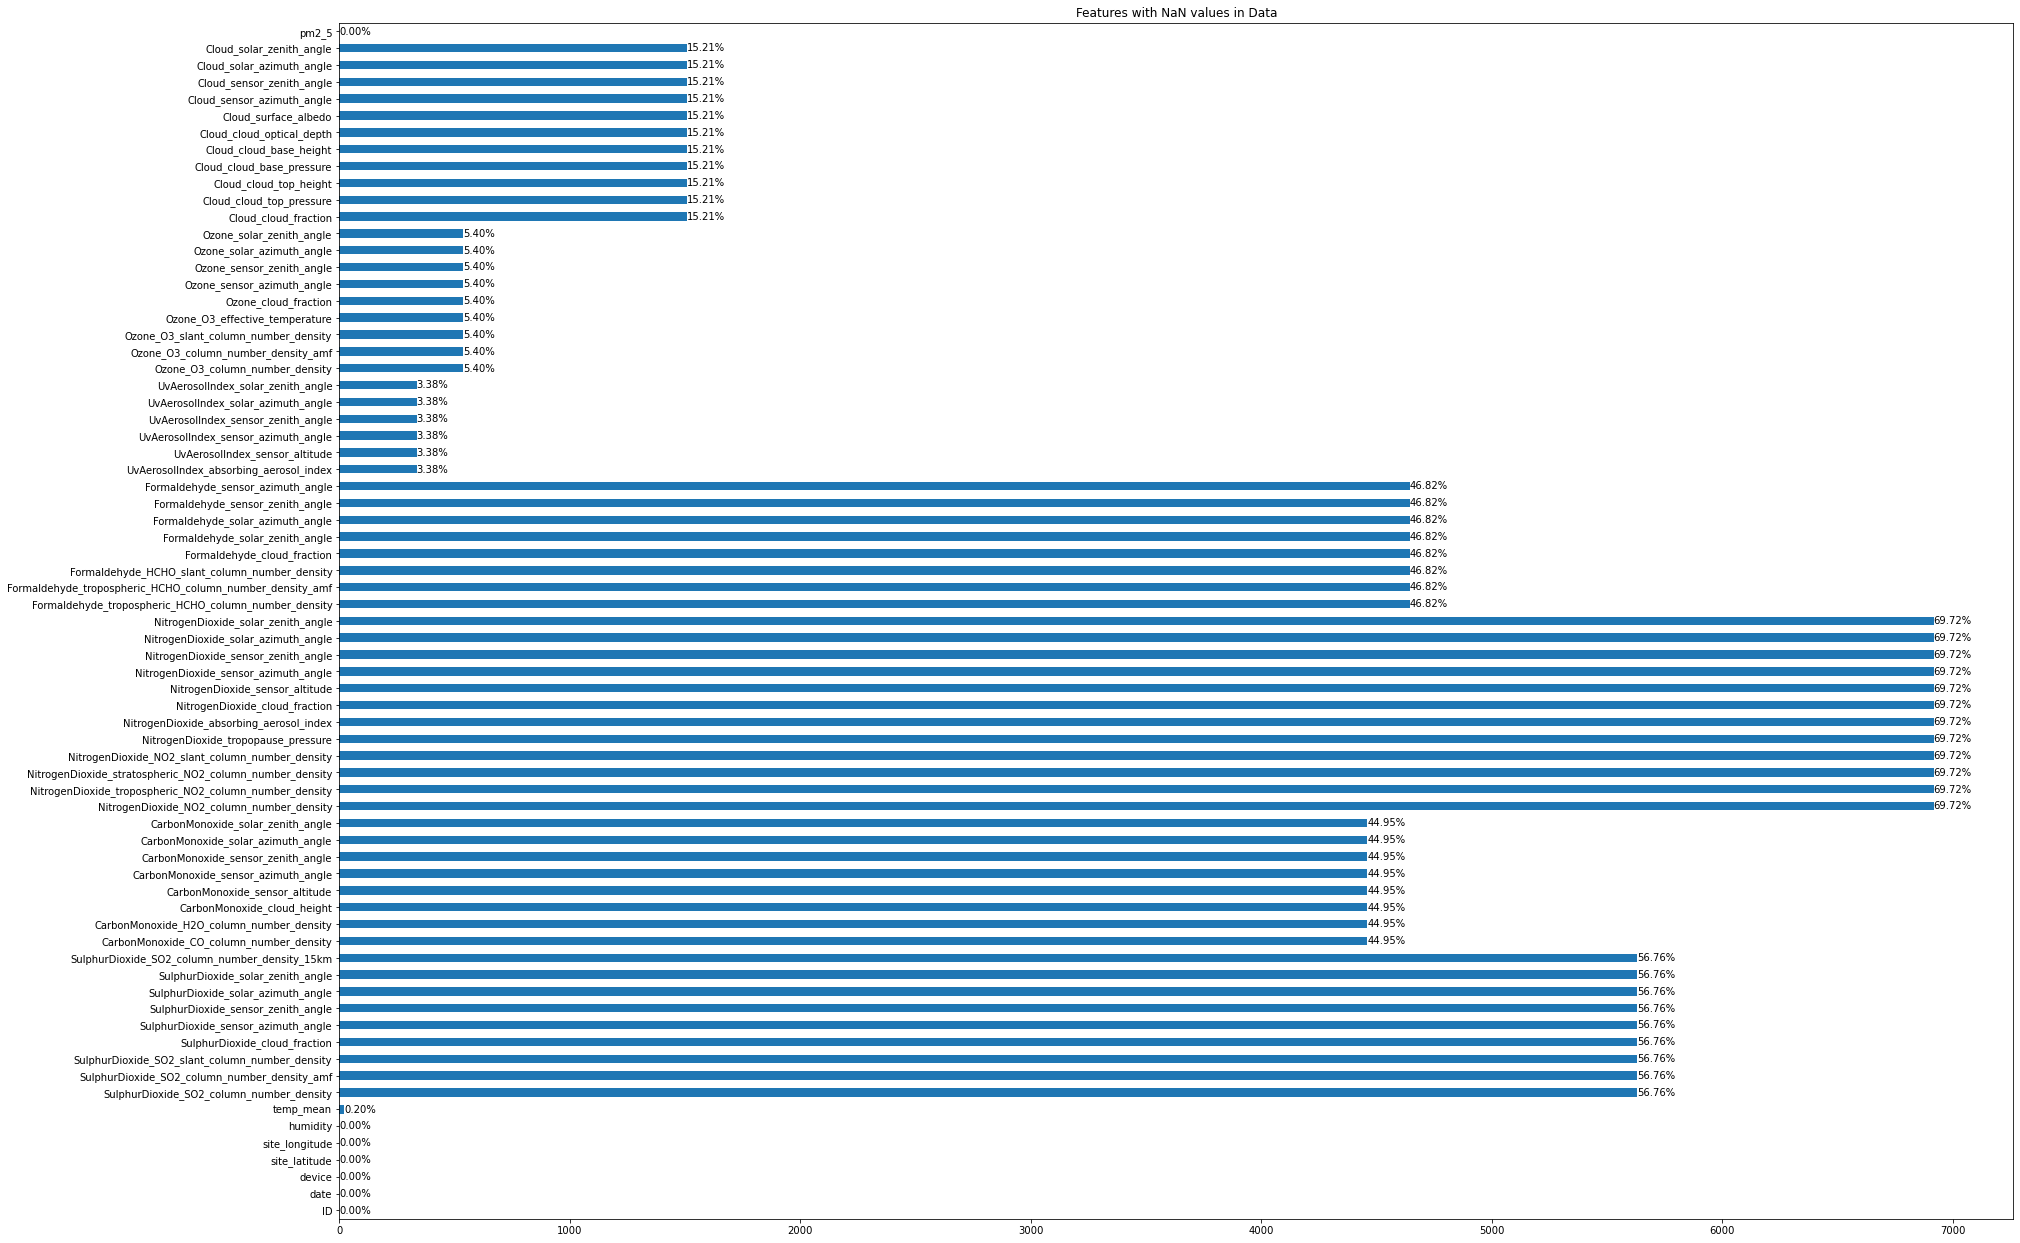

In [23]:
ax = train.isna().sum().plot(kind='barh',figsize=(30,22))
plt.title("Features with NaN values in Data")
for patch in ax.patches:
    percentage = ('{:,.2f}%'.format((patch.get_width()/train.shape[0])*100))
    width, height =patch.get_width(),patch.get_height()
    x=patch.get_x()+width+0.02
    y=patch.get_y()+height/7
    ax.annotate(percentage,(x,y))

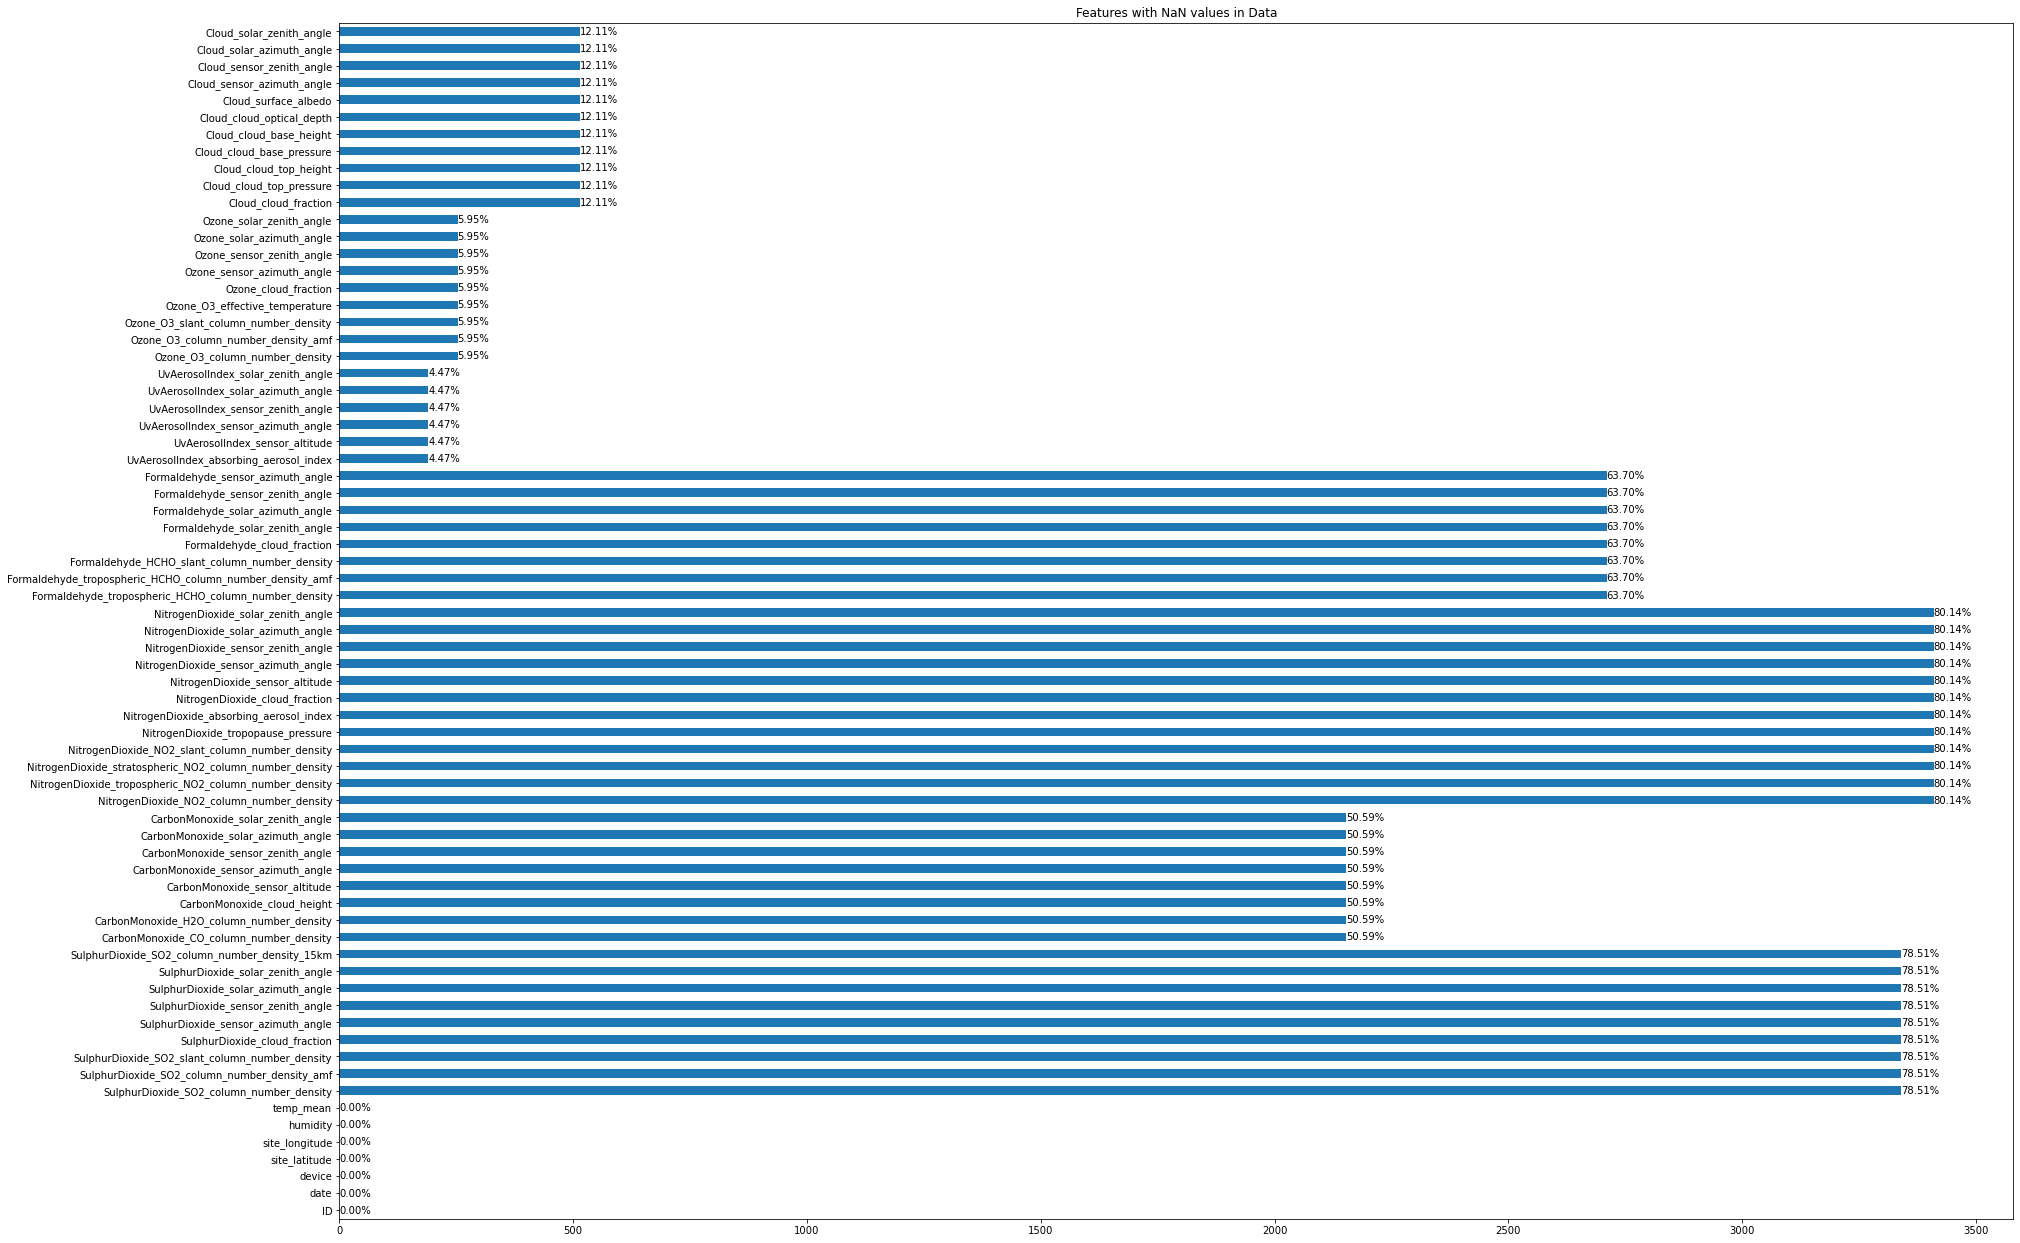

In [34]:
ax = test.isna().sum().plot(kind='barh',figsize=(30,22))
plt.title("Features with NaN values in Data")
for patch in ax.patches:
    percentage = ('{:,.2f}%'.format((patch.get_width()/test.shape[0])*100))
    width, height =patch.get_width(),patch.get_height()
    x=patch.get_x()+width+0.02
    y=patch.get_y()+height/7
    ax.annotate(percentage,(x,y))

A lot of null values exist in the data

In [25]:
train.columns

Index(['ID', 'date', 'device', 'site_latitude', 'site_longitude', 'humidity',
       'temp_mean', 'SulphurDioxide_SO2_column_number_density',
       'SulphurDioxide_SO2_column_number_density_amf',
       'SulphurDioxide_SO2_slant_column_number_density',
       'SulphurDioxide_cloud_fraction', 'SulphurDioxide_sensor_azimuth_angle',
       'SulphurDioxide_sensor_zenith_angle',
       'SulphurDioxide_solar_azimuth_angle',
       'SulphurDioxide_solar_zenith_angle',
       'SulphurDioxide_SO2_column_number_density_15km',
       'CarbonMonoxide_CO_column_number_density',
       'CarbonMonoxide_H2O_column_number_density',
       'CarbonMonoxide_cloud_height', 'CarbonMonoxide_sensor_altitude',
       'CarbonMonoxide_sensor_azimuth_angle',
       'CarbonMonoxide_sensor_zenith_angle',
       'CarbonMonoxide_solar_azimuth_angle',
       'CarbonMonoxide_solar_zenith_angle',
       'NitrogenDioxide_NO2_column_number_density',
       'NitrogenDioxide_tropospheric_NO2_column_number_density',
       

In [26]:
train.describe()

,site_latitude,site_longitude,humidity,temp_mean,SulphurDioxide_SO2_column_number_density,SulphurDioxide_SO2_column_number_density_amf,SulphurDioxide_SO2_slant_column_number_density,SulphurDioxide_cloud_fraction,SulphurDioxide_sensor_azimuth_angle,SulphurDioxide_sensor_zenith_angle,...,Cloud_cloud_top_height,Cloud_cloud_base_pressure,Cloud_cloud_base_height,Cloud_cloud_optical_depth,Cloud_surface_albedo,Cloud_sensor_azimuth_angle,Cloud_sensor_zenith_angle,Cloud_solar_azimuth_angle,Cloud_solar_zenith_angle,pm2_5
count,9923.000000,9923.000000,9923.000000,9903.000000,4291.000000,4291.000000,4291.000000,4291.000000,4291.000000,4291.000000,...,8414.000000,8414.000000,8414.000000,8414.000000,8414.000000,8414.000000,8414.000000,8414.000000,8414.000000,9923.000000
mean,0.242512,32.472012,0.790819,21.571340,0.000025,0.791470,0.000014,0.146898,-17.585282,37.885657,...,6334.871458,56017.987582,5405.379477,17.943963,0.269046,-17.784138,40.689597,-86.994058,27.792085,57.107307
std,0.332311,0.545655,0.157910,4.060502,0.000299,0.197640,0.000207,0.085867,86.751706,19.323026,...,3172.279161,19694.711846,3073.159743,33.709480,0.052252,86.453994,19.073526,40.091767,6.905511,27.482947
min,-1.244985,29.989236,0.000000,0.000000,-0.000996,0.345894,-0.000671,0.000000,-105.713519,0.100934,...,1150.149929,15003.535156,1150.149929,1.250367,0.012392,-106.727040,0.101032,-160.284790,8.387497,1.160400
25%,0.289040,32.553714,0.770865,21.233081,-0.000149,0.659173,-0.000117,0.084368,-99.640536,22.521445,...,3948.409668,39480.238281,2952.133894,4.790914,0.240371,-99.612631,26.535263,-126.529379,23.377410,38.028288
50%,0.315446,32.589580,0.822951,22.271875,0.000010,0.785107,0.000009,0.148113,-97.301544,42.489365,...,5768.341064,57283.976562,4768.781361,6.774909,0.267970,-97.295380,45.016811,-85.782608,28.024277,51.930242
75%,0.354700,32.617600,0.869333,23.314268,0.000182,0.906811,0.000139,0.216913,73.653023,55.985201,...,8665.129820,71602.269531,7665.129820,14.080288,0.295240,72.932994,57.407260,-50.006933,32.795132,72.033125
max,0.391478,32.752570,1.000000,29.735000,0.001880,1.633184,0.002445,0.299840,84.742798,66.024800,...,15000.000287,88513.484375,14000.000268,250.000000,1.000000,84.802010,66.234421,-20.702782,41.993103,440.920000


Some features have a min value of over 1000, i was thinking of making NaN values to 0, but there is huge disparity between 1000 and 0, so i am considering leaving NaN values as that, certain algorithms can handle NaN values

It is quite noticeable the missing values are MNAR, as they depend on the feature itself, a particular feature missing values temp_mean could be regarded as MCAR, lets determine what to do with them

In [71]:
#Set all missing values in temp_mean column to 0
train.loc[train['temp_mean'].isna(),'temp_mean'] = 0
train['temp_mean'].isna().sum()

0

<AxesSubplot:xlabel='pm2_5', ylabel='device'>

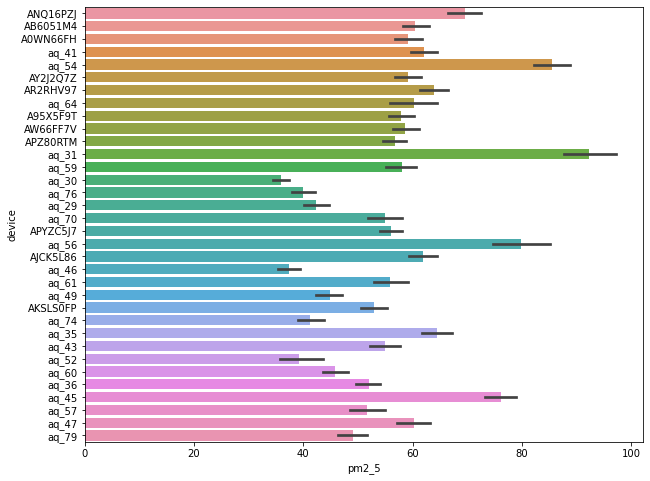

In [50]:
sns.barplot(x='pm2_5',y='device',data=train,orient="h")

In [35]:
train.device.value_counts()

aq_30       464
aq_41       453
aq_45       372
aq_43       359
aq_46       352
aq_49       351
APYZC5J7    329
AR2RHV97    329
AKSLS0FP    328
AJCK5L86    328
AB6051M4    328
ANQ16PZJ    328
AY2J2Q7Z    328
A0WN66FH    328
APZ80RTM    328
AW66FF7V    328
A95X5F9T    328
aq_29       314
aq_52       295
aq_54       284
aq_35       281
aq_36       279
aq_61       268
aq_59       261
aq_31       254
aq_47       244
aq_70       239
aq_60       235
aq_56       221
aq_74       204
aq_79       181
aq_57       161
aq_64       127
aq_76       114
Name: device, dtype: int64

In [72]:
train.device=train.device.apply(lambda x: x.split('_')[0] if 'aq' in x else x)

In [91]:
test.device=test.device.apply(lambda x: x.split('_')[0] if 'aq' in x else x)

<AxesSubplot:xlabel='pm2_5', ylabel='device'>

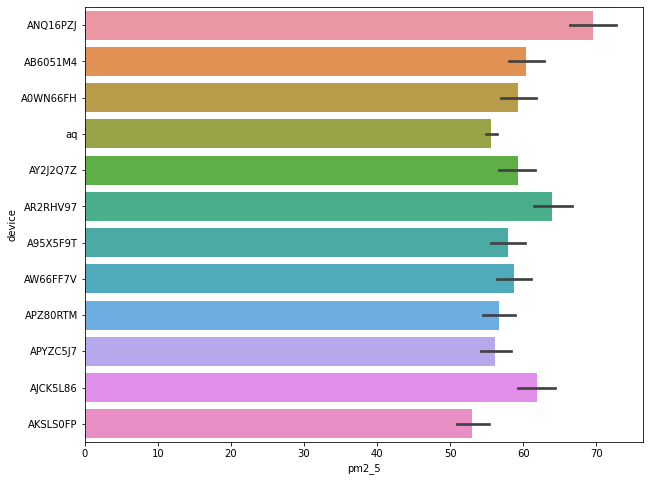

In [73]:
sns.barplot(x='pm2_5',y='device',data=train,orient="h")

In [74]:
train.device.value_counts()

aq          6313
AR2RHV97     329
APYZC5J7     329
ANQ16PZJ     328
AB6051M4     328
A0WN66FH     328
AY2J2Q7Z     328
A95X5F9T     328
AW66FF7V     328
APZ80RTM     328
AJCK5L86     328
AKSLS0FP     328
Name: device, dtype: int64

In [75]:
train.device = train.device.apply(lambda x: 'A' if 'A' in x else x)

In [92]:
test.device = test.device.apply(lambda x: 'A' if 'A' in x else x)

<AxesSubplot:xlabel='pm2_5', ylabel='device'>

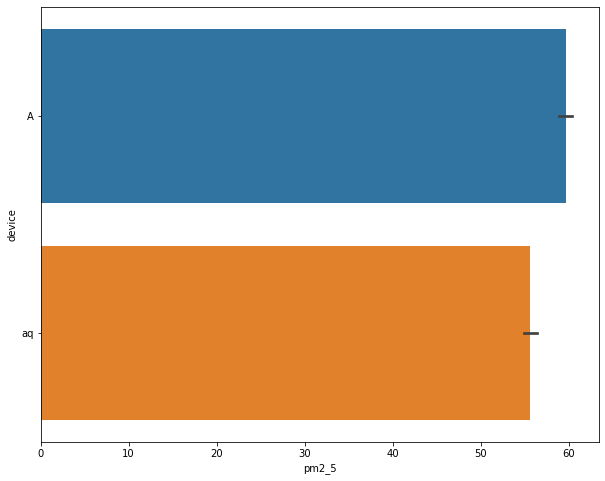

In [76]:
sns.barplot(x='pm2_5',y='device',data=train,orient="h")

Created two subsets of devices, the ones starting with aq and ones starting with A

In [77]:
train

,ID,date,device,site_latitude,site_longitude,humidity,temp_mean,SulphurDioxide_SO2_column_number_density,SulphurDioxide_SO2_column_number_density_amf,SulphurDioxide_SO2_slant_column_number_density,...,Cloud_cloud_top_height,Cloud_cloud_base_pressure,Cloud_cloud_base_height,Cloud_cloud_optical_depth,Cloud_surface_albedo,Cloud_sensor_azimuth_angle,Cloud_sensor_zenith_angle,Cloud_solar_azimuth_angle,Cloud_solar_zenith_angle,pm2_5
0,ID_JBYXJEUZ8X,2020-03-18,A,0.353465,32.560322,0.846844,22.038542,-0.000138,1.042629,-0.000143,...,4181.792969,69589.453125,3181.793457,7.799846,0.278111,76.618553,9.970293,-93.110069,19.214193,63.853333
1,ID_PEJJNLBUPR,2019-10-13,A,0.390741,32.582257,0.874493,21.545833,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,32.507083
2,ID_21L8UZQO1T,2019-12-21,A,0.285751,32.578325,0.729340,23.568655,NaN,NaN,NaN,...,4440.391113,67341.109375,3440.390869,62.496590,0.416631,-97.300758,63.690605,-127.856804,40.857922,80.290833
3,ID_GNW2G8J4T8,2020-02-20,aq,-1.244985,29.989236,0.919271,16.338542,-0.000111,0.750228,-0.000083,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,42.601687
4,ID_4XOX2V6SK0,2019-04-17,aq,-1.244985,29.989236,0.858365,16.602083,-0.000127,0.792634,-0.000101,...,4842.057488,64347.788635,3842.057585,4.971117,0.277157,74.786025,32.583070,-57.273638,21.864529,89.642229
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9918,ID_E2O117AYG3,2020-07-20,A,0.306666,32.608550,0.736872,22.965972,NaN,NaN,NaN,...,7156.016834,48356.941077,6156.016834,3.419584,0.235853,72.847686,50.858546,-31.908548,24.023105,69.690417
9919,ID_8CJG37XAYN,2020-02-23,aq,0.307780,32.651449,0.721721,26.555392,-0.000684,0.414260,-0.000283,...,13266.058594,20344.134766,12266.058594,10.198909,0.284046,-97.272919,64.089607,-109.482361,32.003708,47.470518
9920,ID_NTRI2J528O,2020-04-17,A,0.343898,32.587226,0.810413,22.915625,NaN,NaN,NaN,...,7754.737305,44284.785156,6754.737305,5.724823,0.299491,-98.203743,53.532288,-70.173080,32.261959,43.237917
9921,ID_IBH41YUMOZ,2020-06-08,aq,0.357987,32.584100,0.876437,21.258333,NaN,NaN,NaN,...,6357.190430,53044.425781,5357.190430,49.711514,0.279414,71.634727,61.877548,-26.566027,25.409733,25.599925


In [80]:
numerical_cols = [col for col in train.select_dtypes('number').columns]
numerical_cols

['site_latitude',
 'site_longitude',
 'humidity',
 'temp_mean',
 'SulphurDioxide_SO2_column_number_density',
 'SulphurDioxide_SO2_column_number_density_amf',
 'SulphurDioxide_SO2_slant_column_number_density',
 'SulphurDioxide_cloud_fraction',
 'SulphurDioxide_sensor_azimuth_angle',
 'SulphurDioxide_sensor_zenith_angle',
 'SulphurDioxide_solar_azimuth_angle',
 'SulphurDioxide_solar_zenith_angle',
 'SulphurDioxide_SO2_column_number_density_15km',
 'CarbonMonoxide_CO_column_number_density',
 'CarbonMonoxide_H2O_column_number_density',
 'CarbonMonoxide_cloud_height',
 'CarbonMonoxide_sensor_altitude',
 'CarbonMonoxide_sensor_azimuth_angle',
 'CarbonMonoxide_sensor_zenith_angle',
 'CarbonMonoxide_solar_azimuth_angle',
 'CarbonMonoxide_solar_zenith_angle',
 'NitrogenDioxide_NO2_column_number_density',
 'NitrogenDioxide_tropospheric_NO2_column_number_density',
 'NitrogenDioxide_stratospheric_NO2_column_number_density',
 'NitrogenDioxide_NO2_slant_column_number_density',
 'NitrogenDioxide_trop

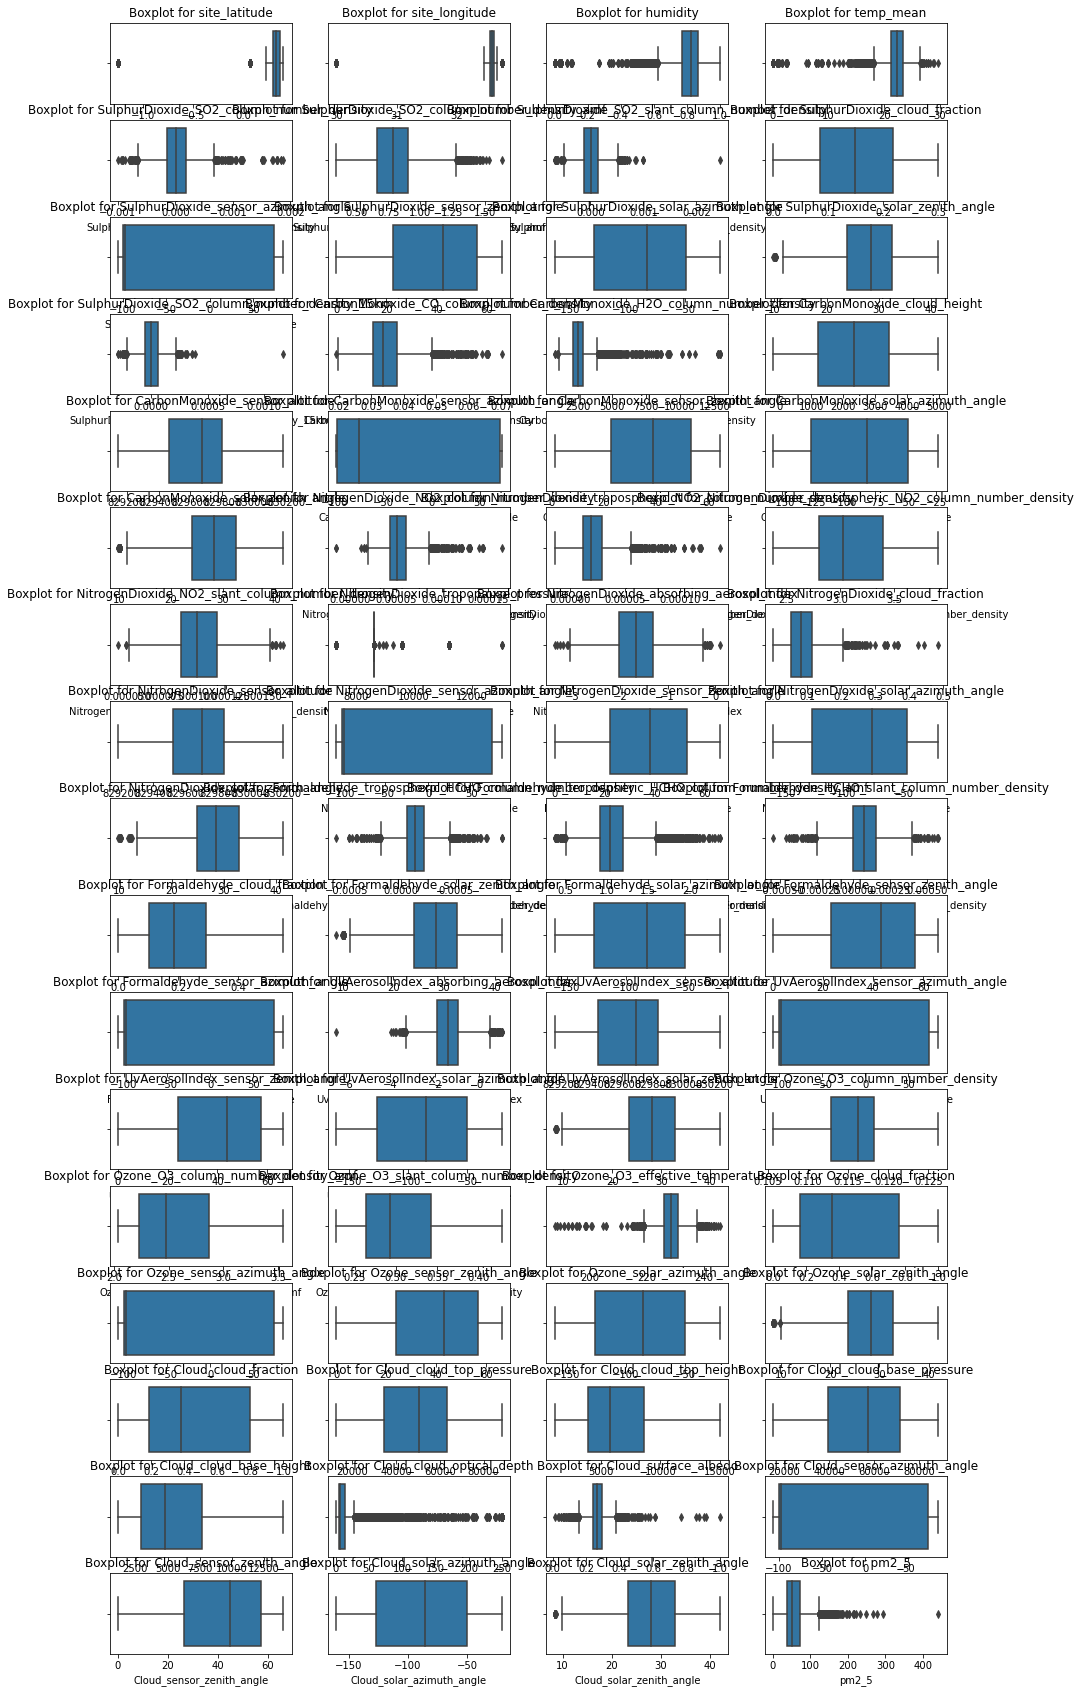

In [87]:
fig, axes = plt.subplots(17, 4, figsize=(15, 30))
for num, col in enumerate(numerical_cols):
    ax = sns.boxplot(x=col, data=train, ax=axes[num // 4, num % 4])
    ax.set_xlabel(col)
    ax.set_title('Boxplot for ' + col)

plt.show()


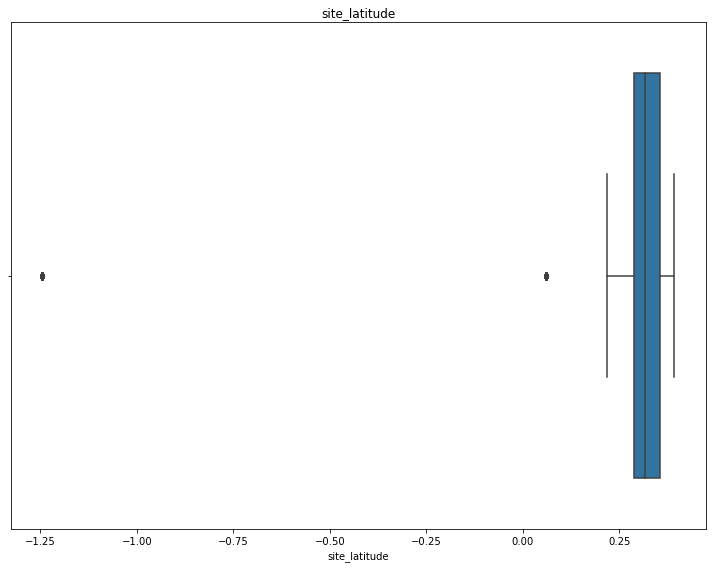

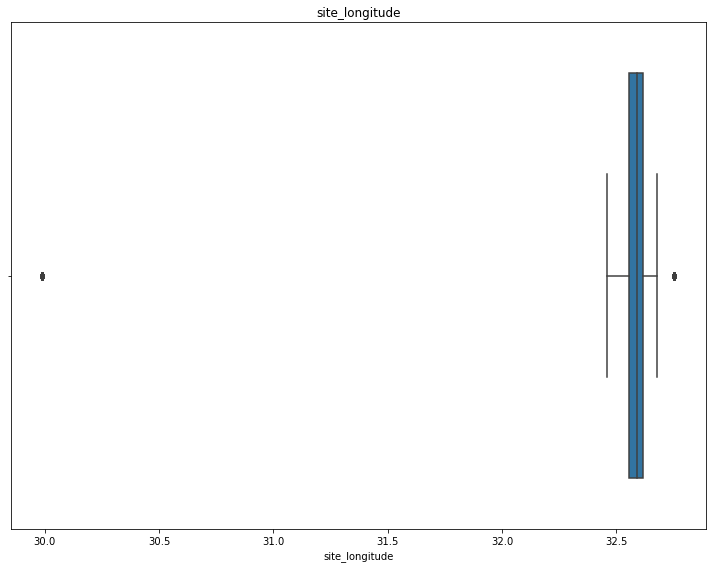

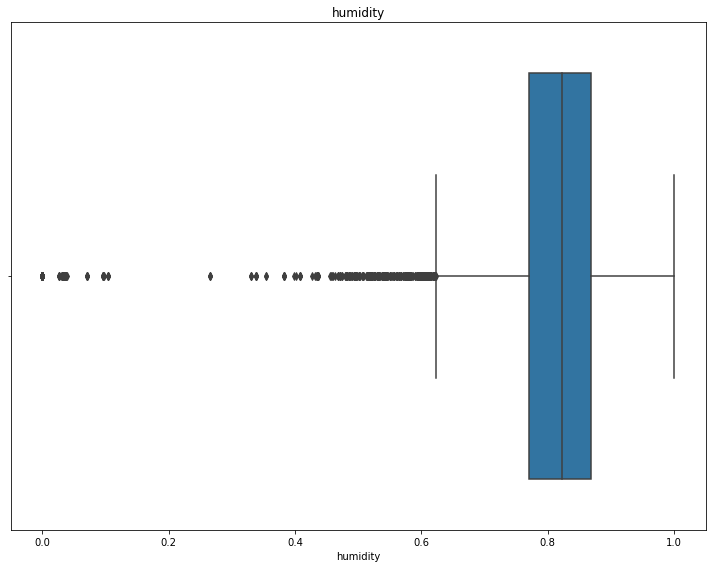

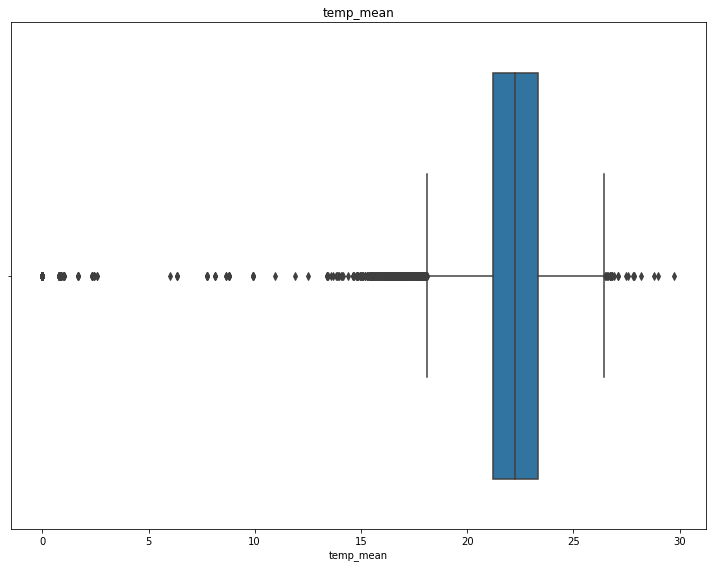

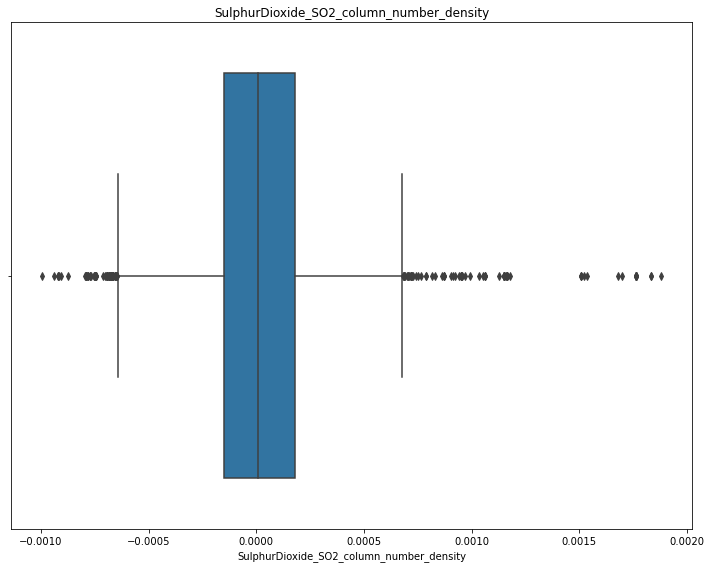

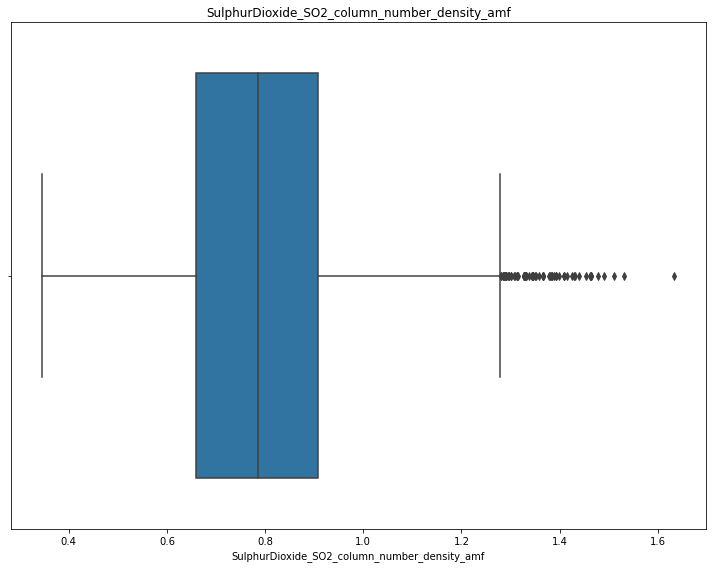

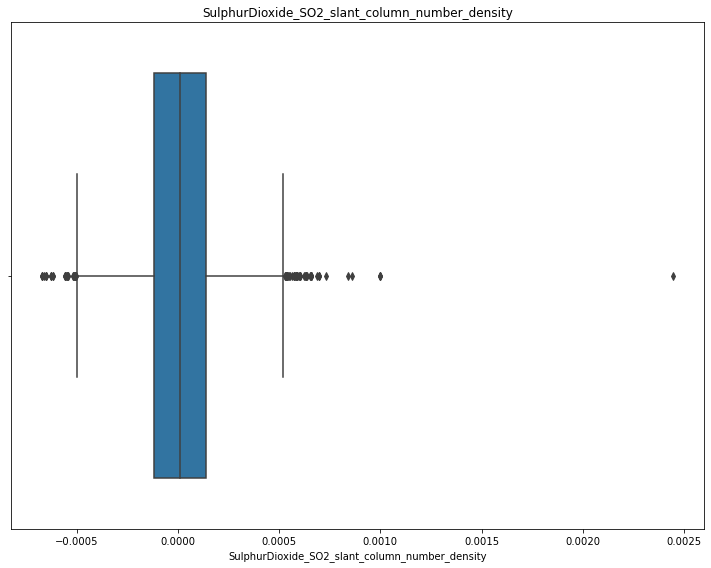

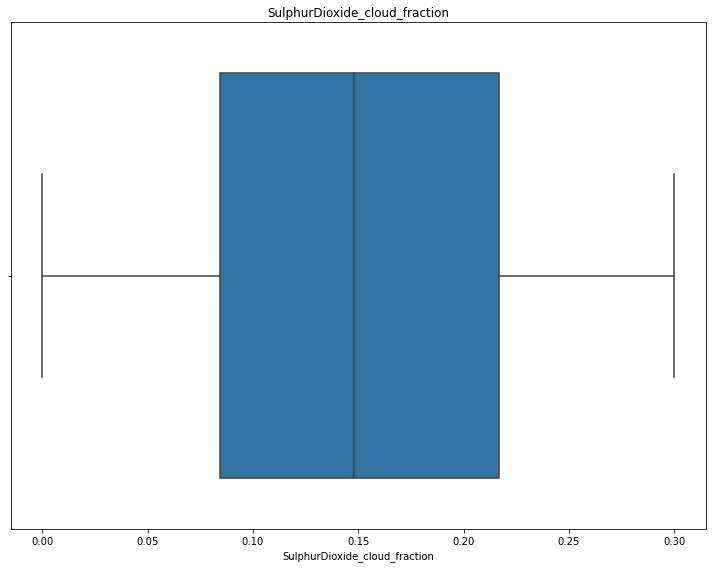

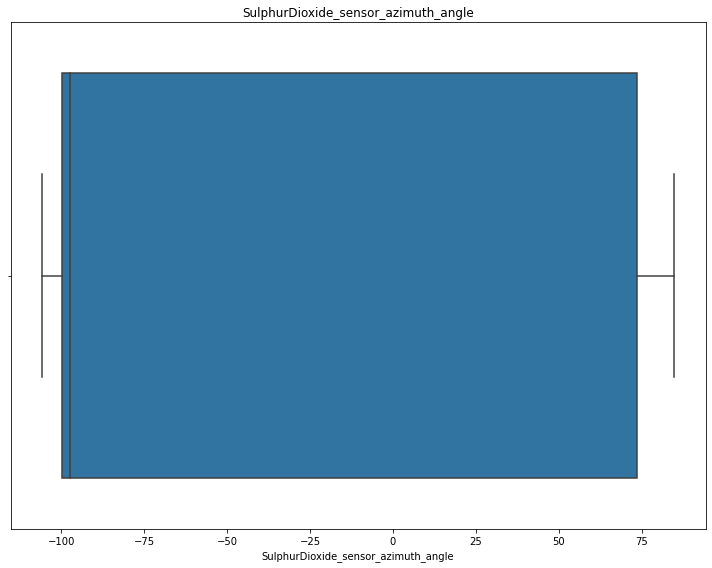

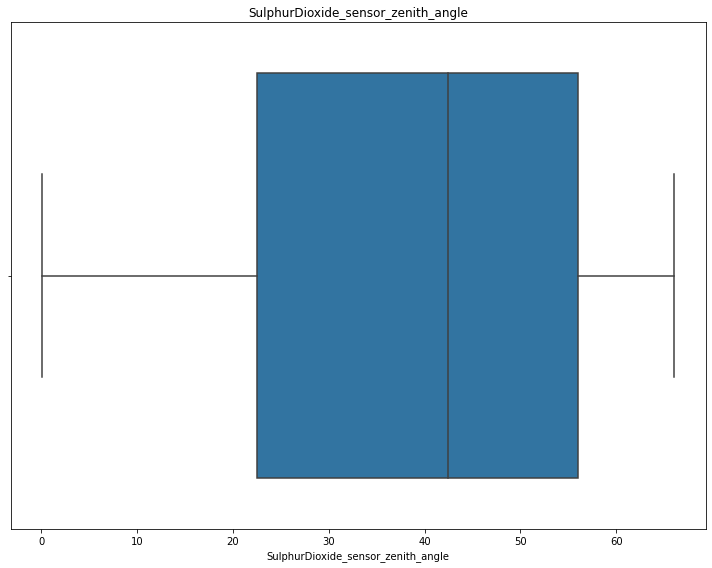

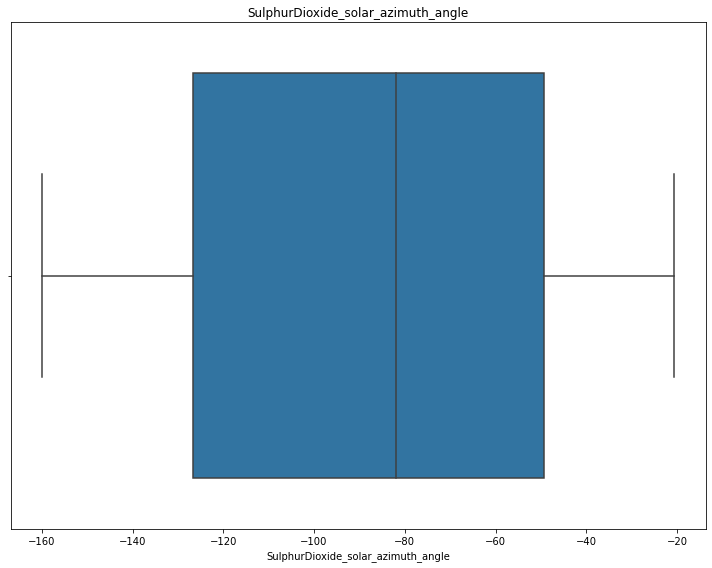

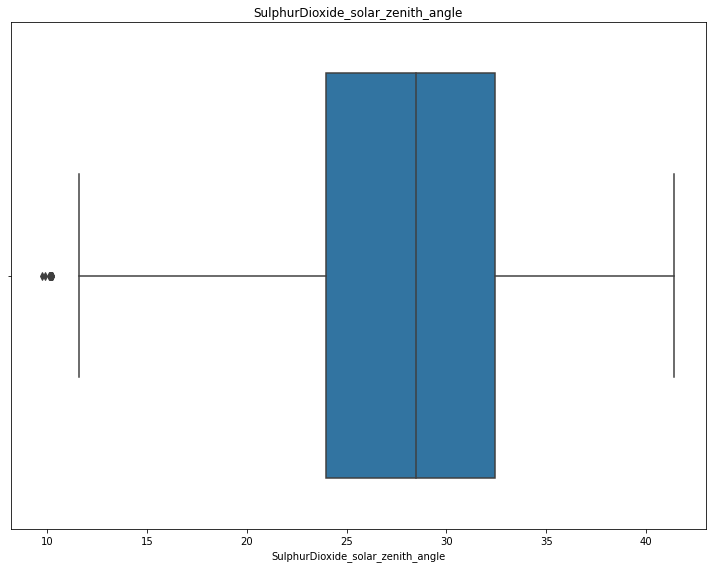

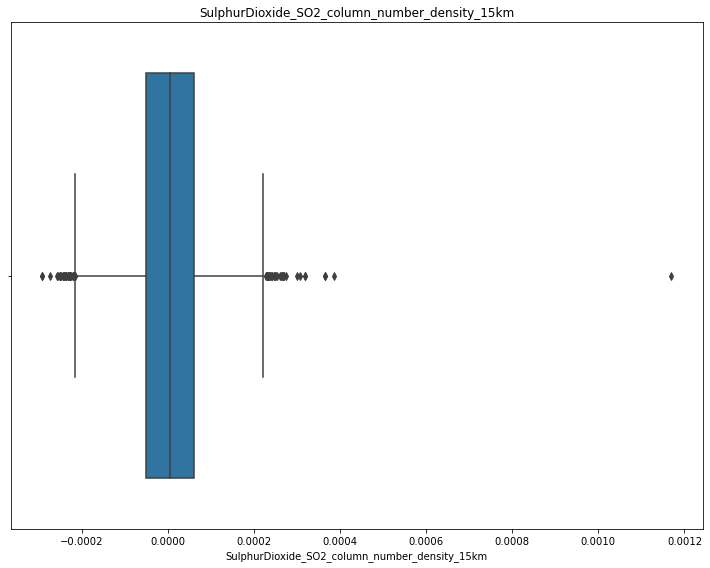

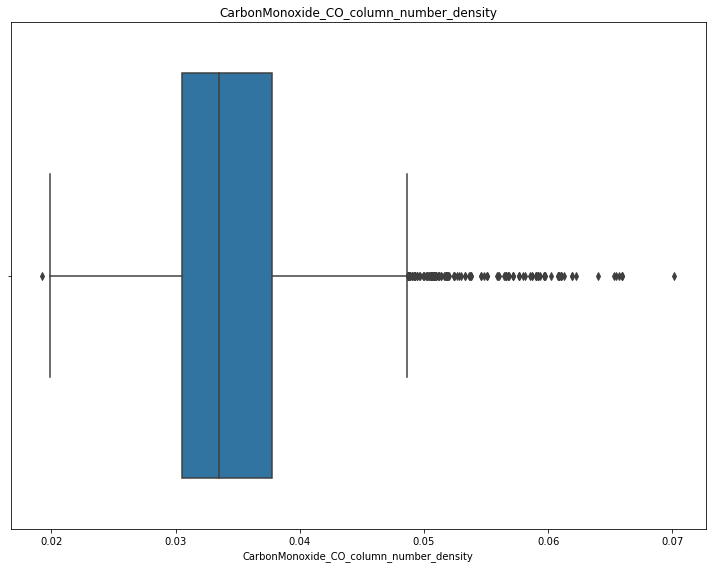

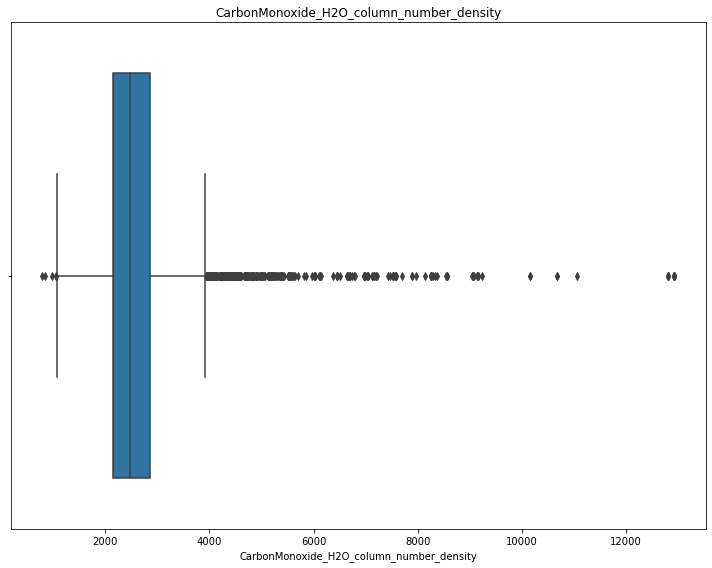

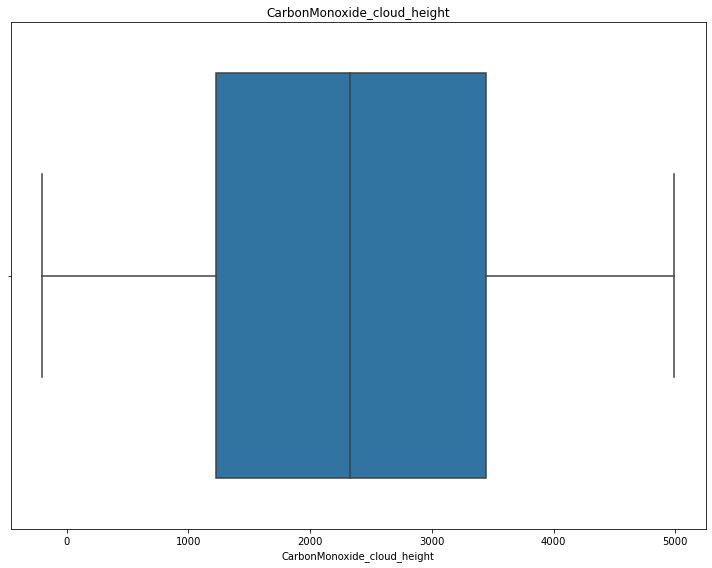

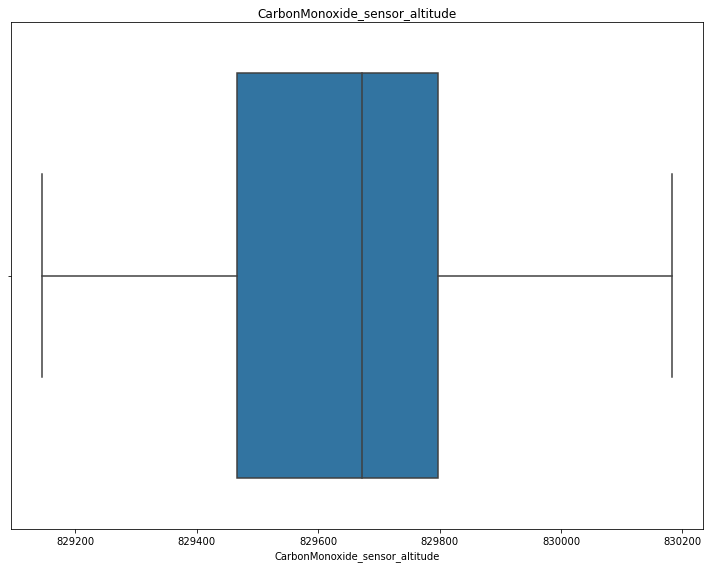

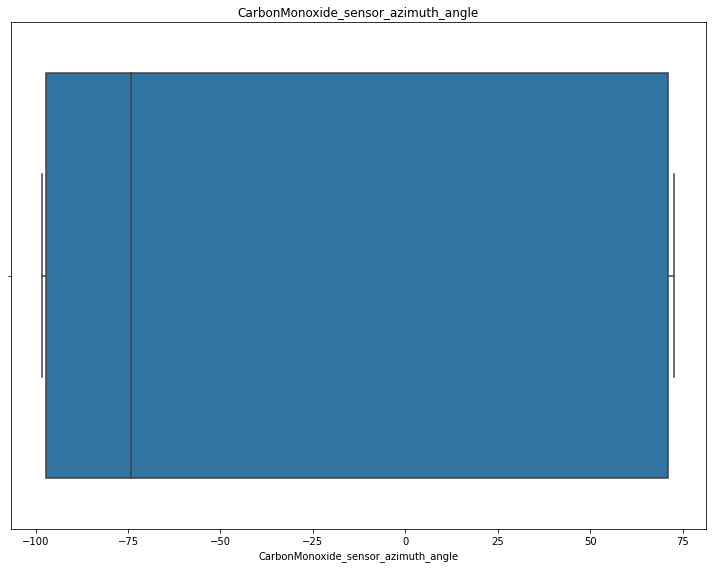

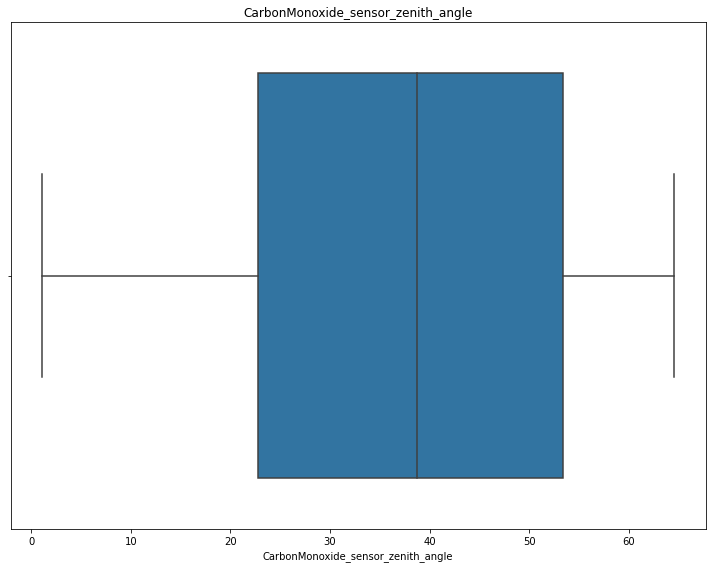

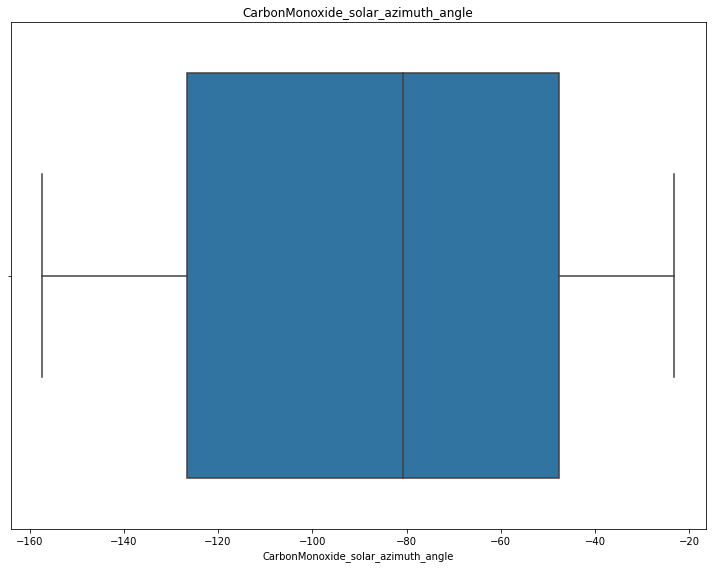

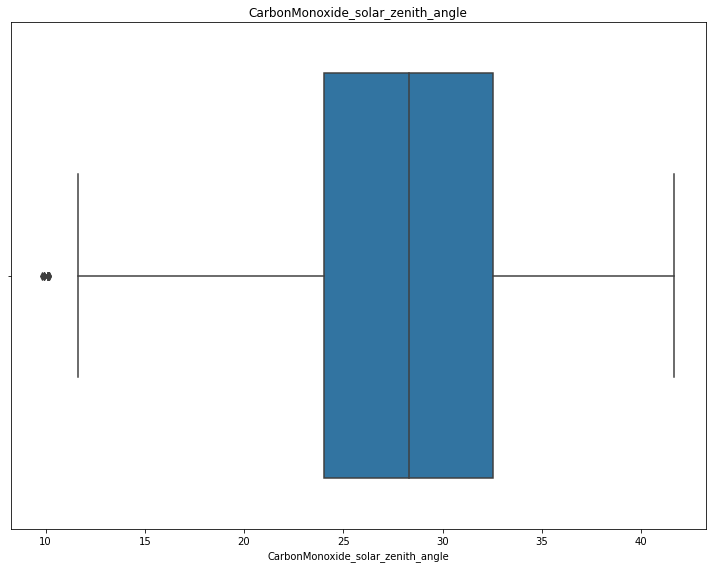

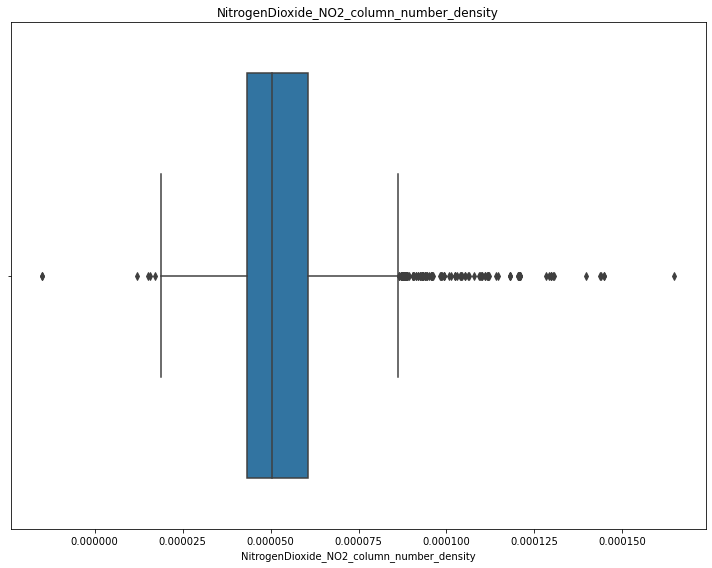

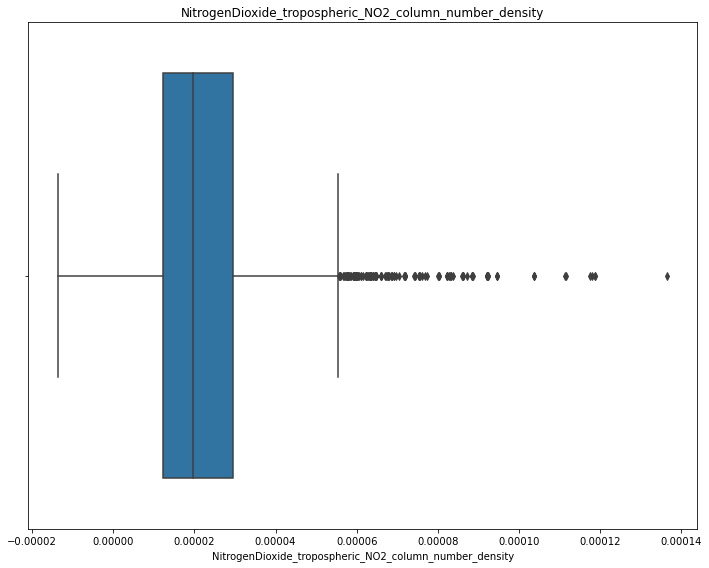

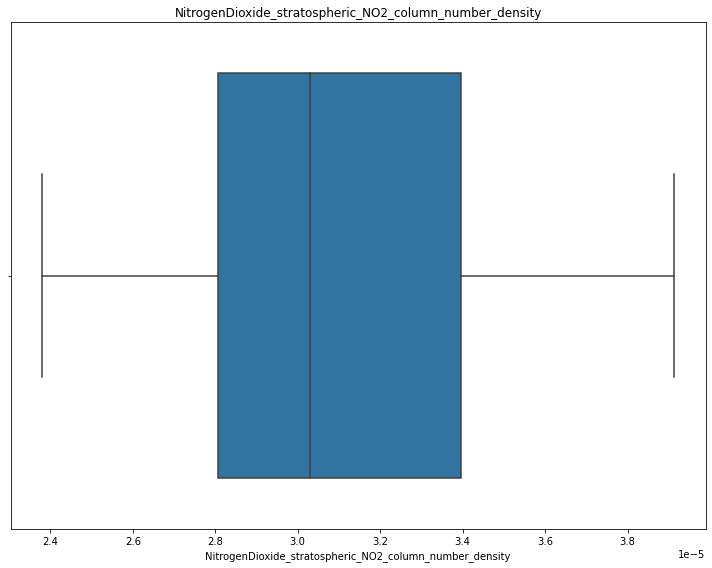

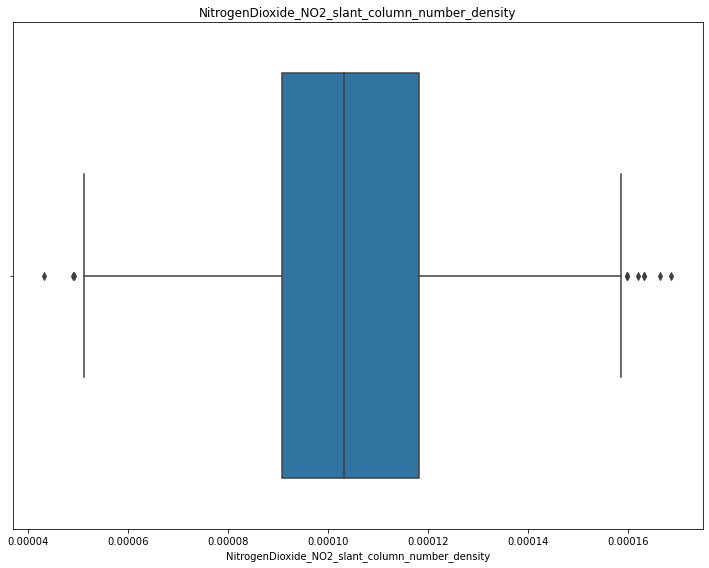

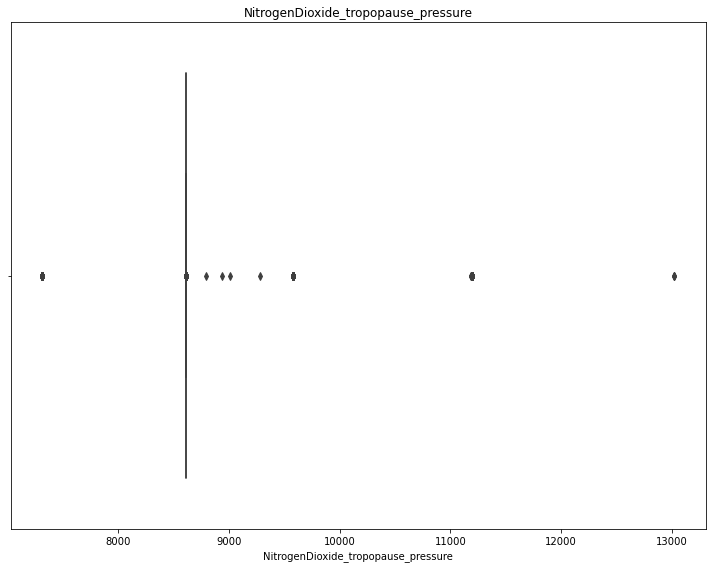

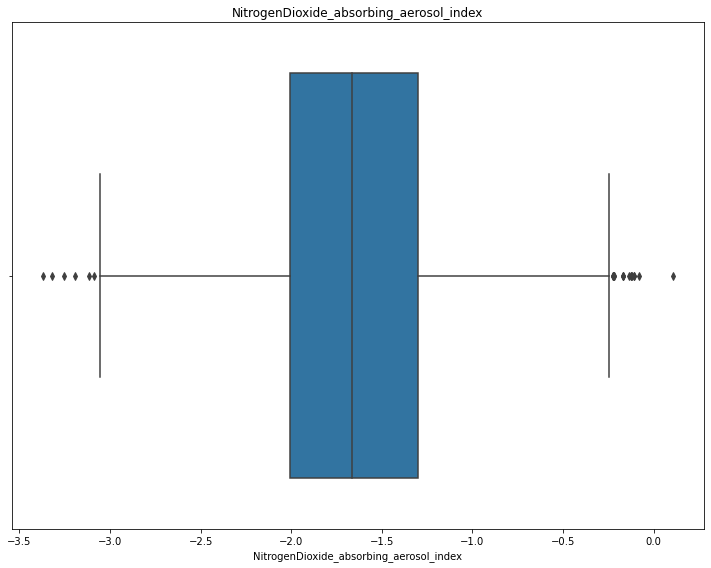

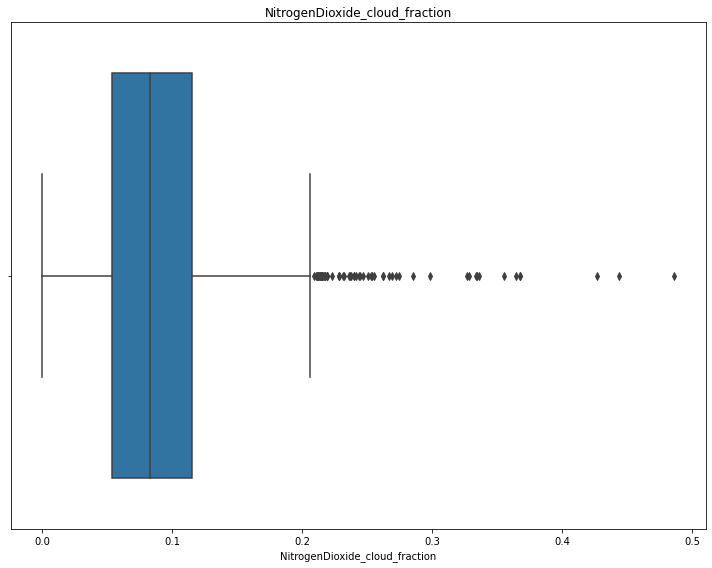

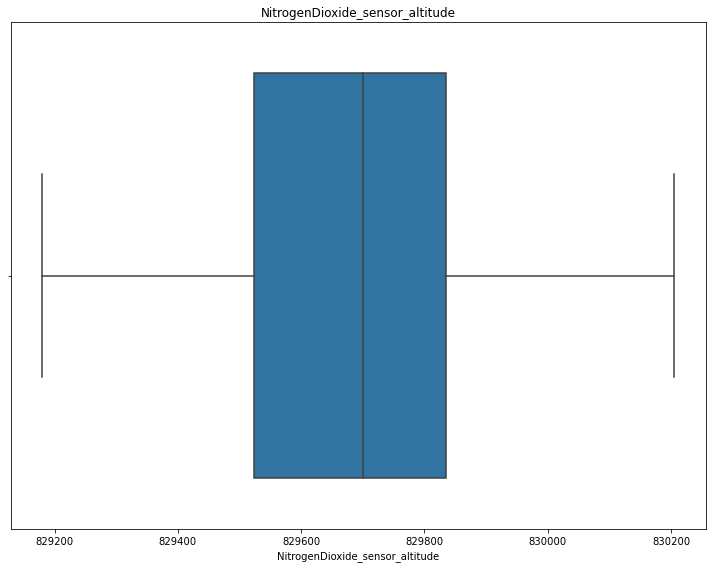

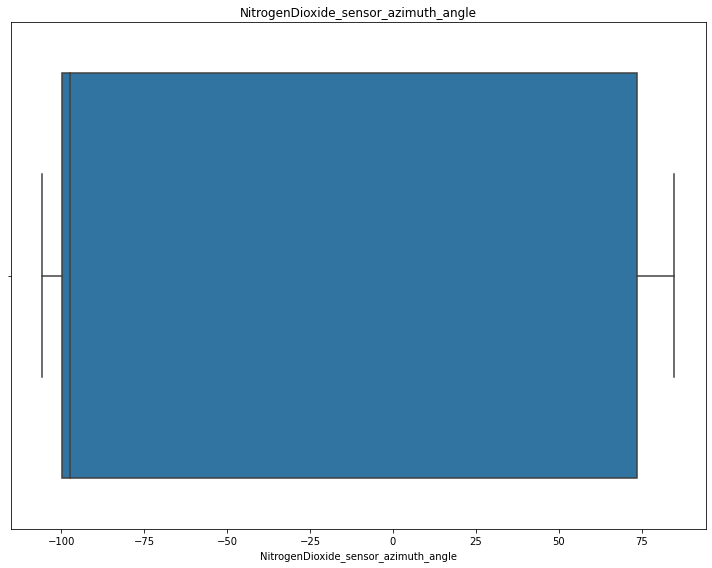

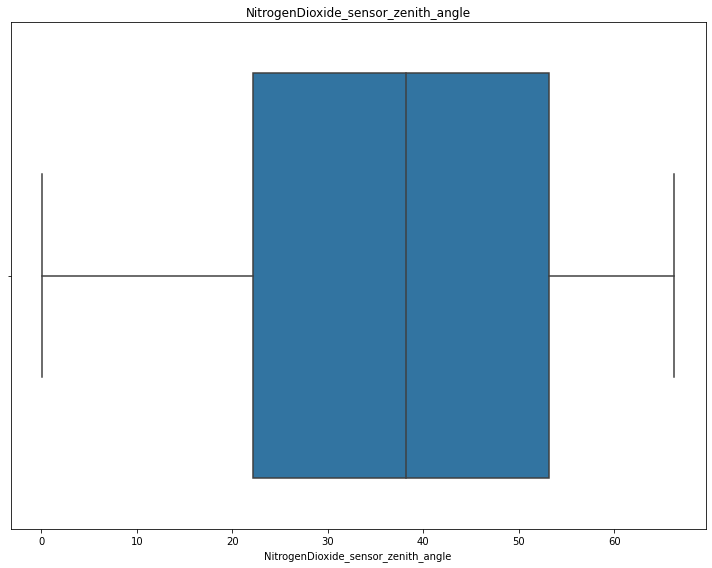

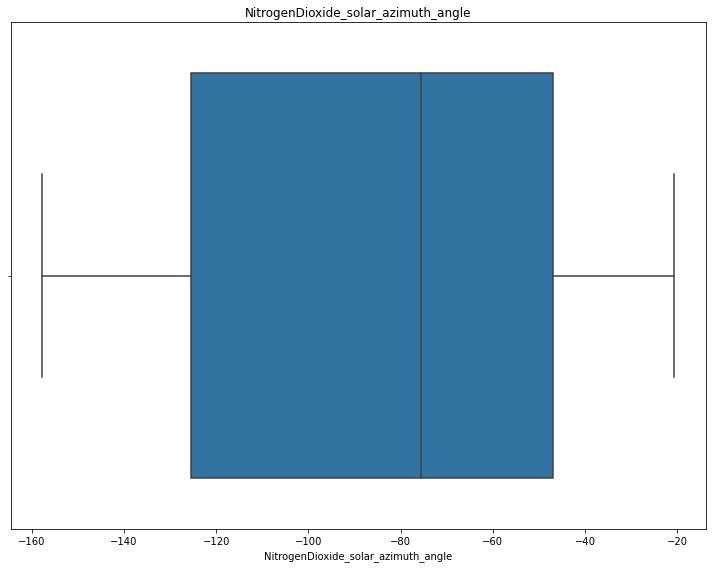

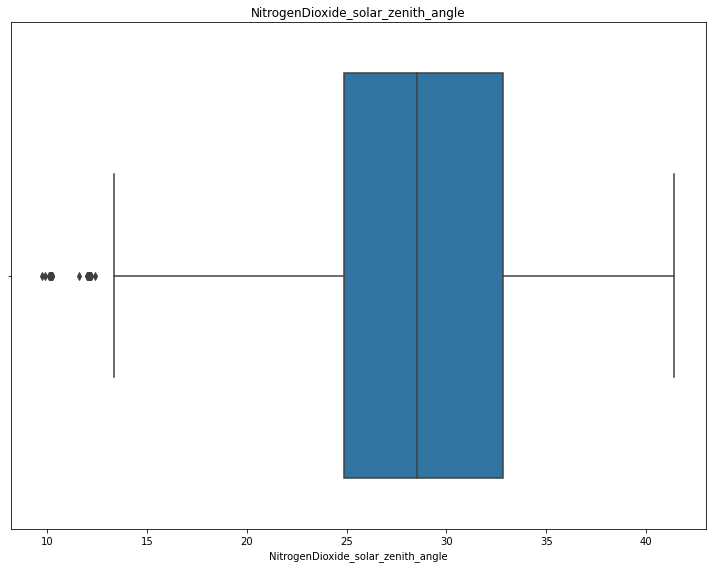

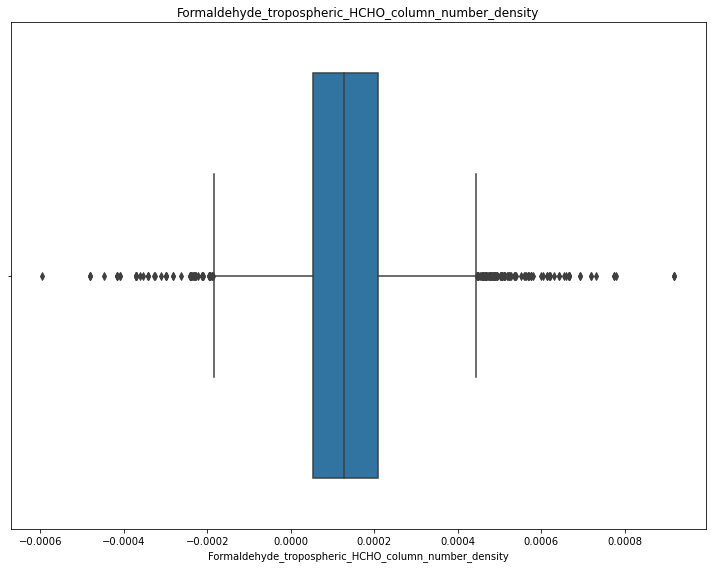

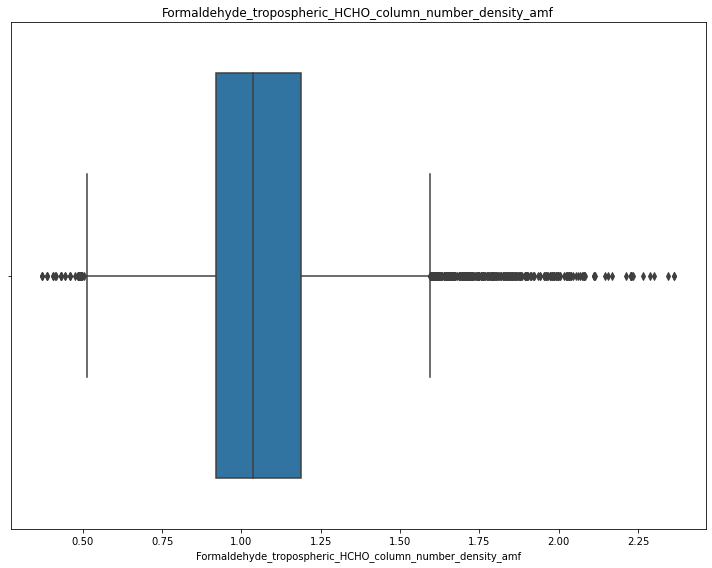

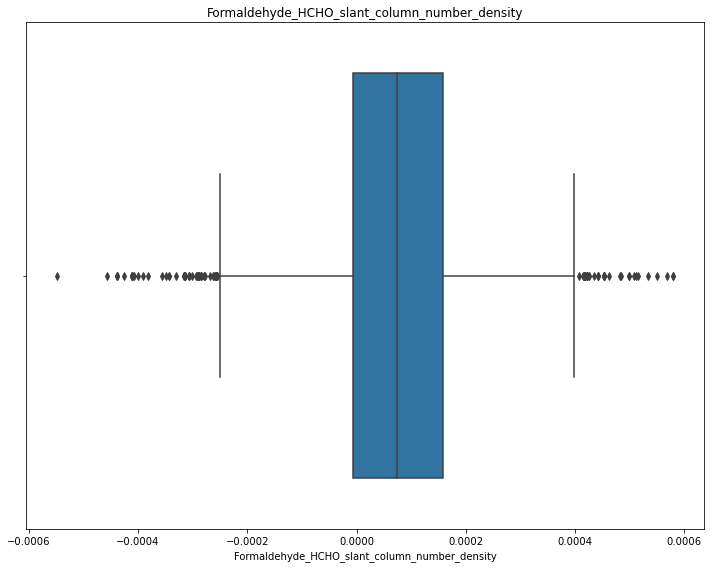

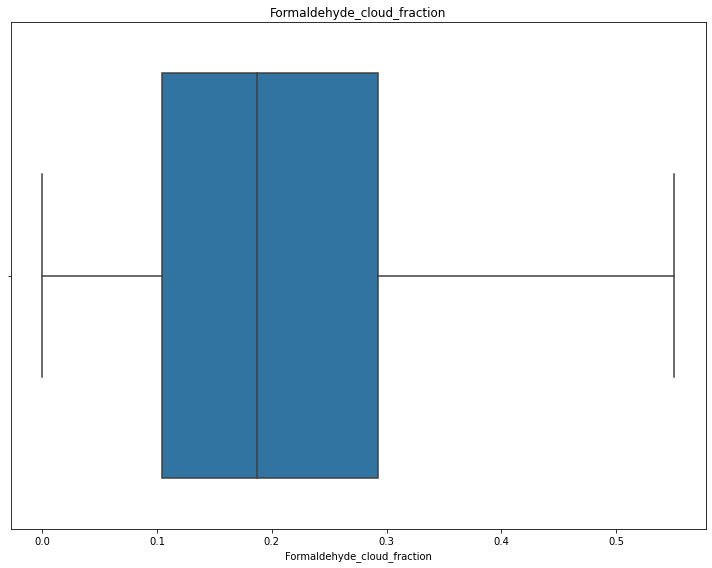

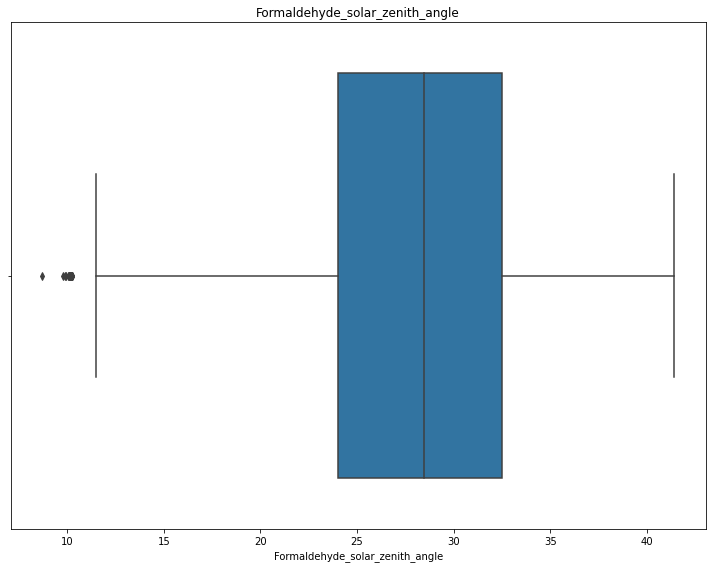

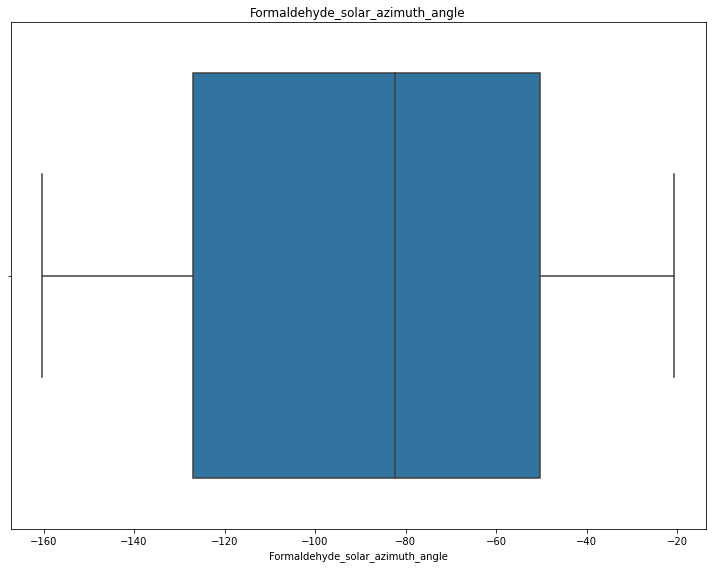

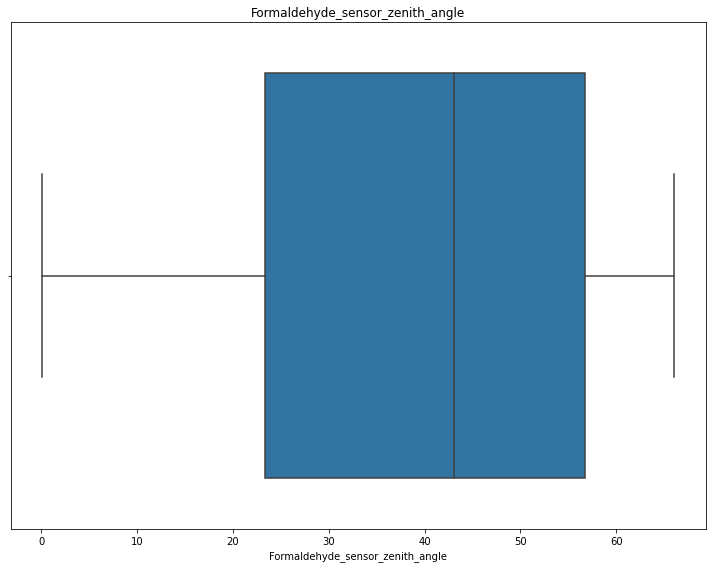

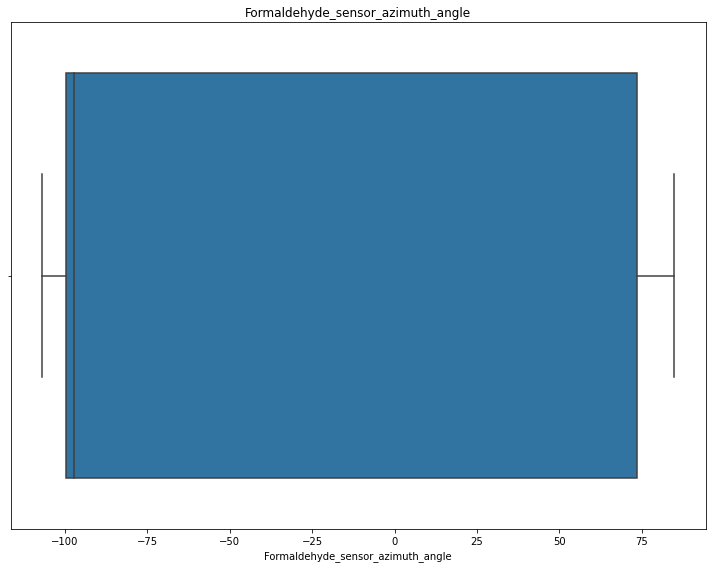

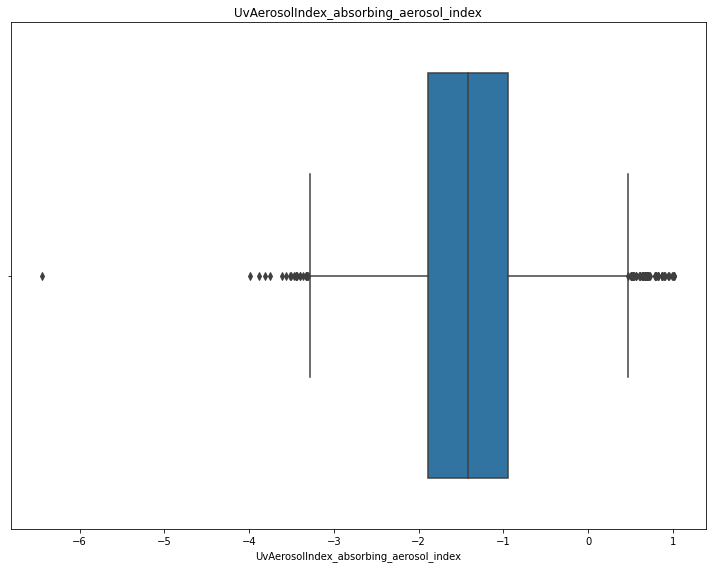

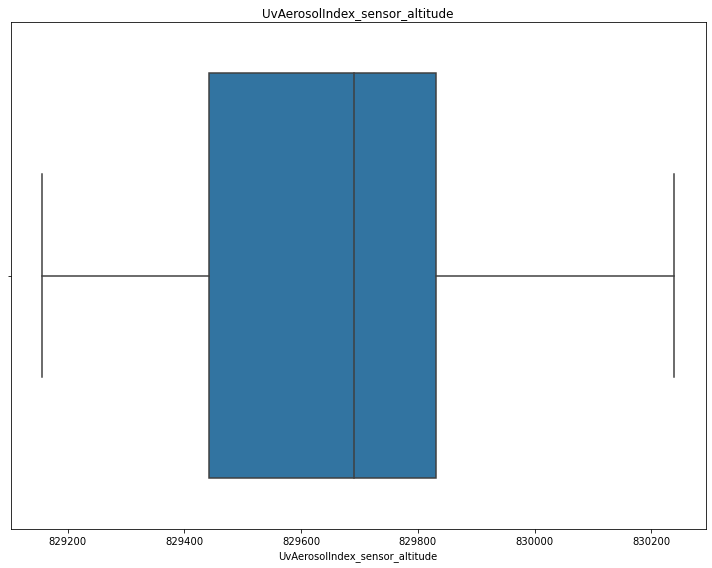

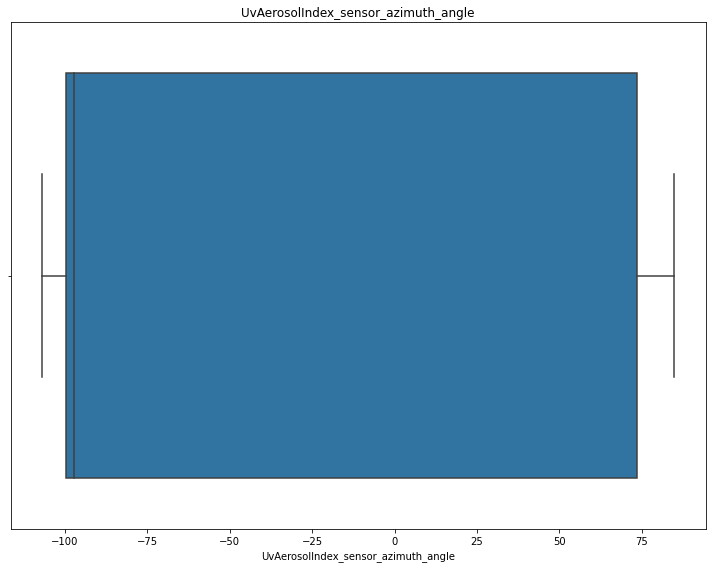

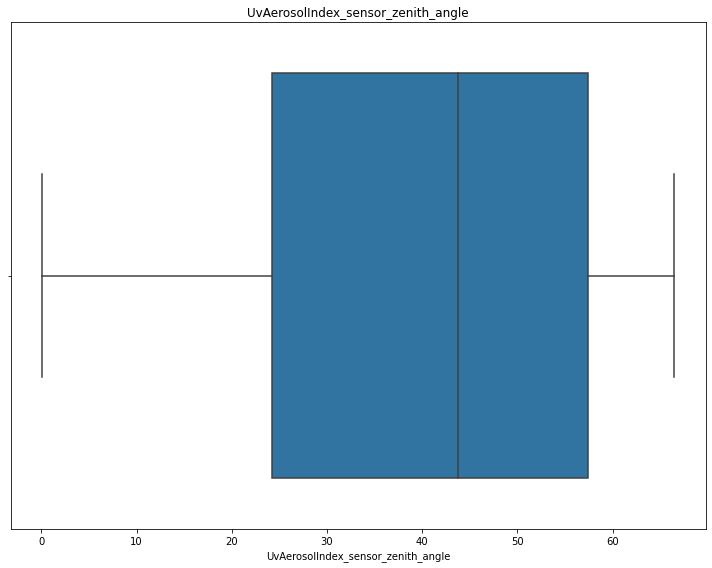

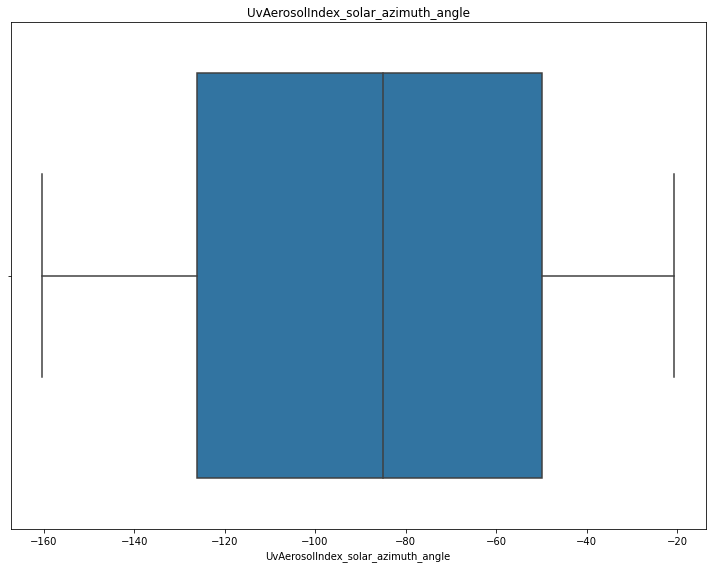

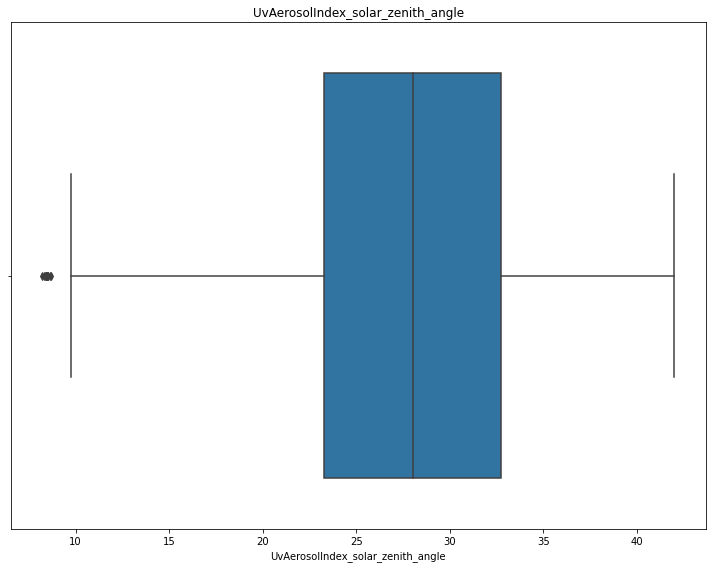

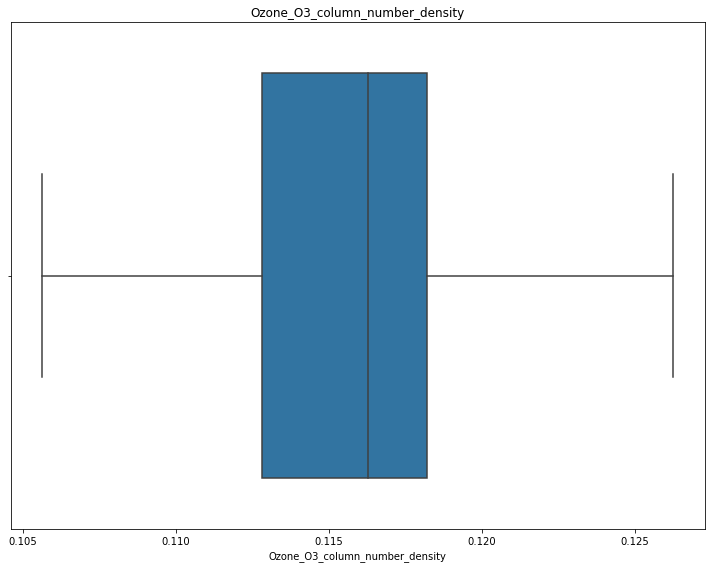

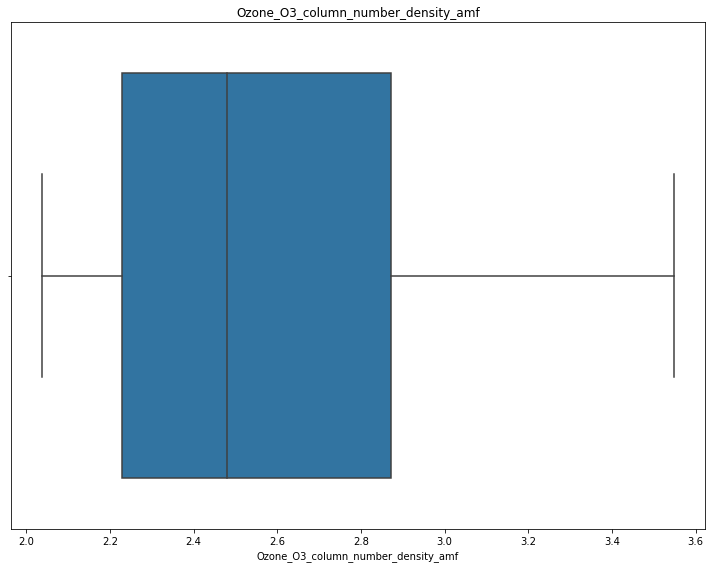

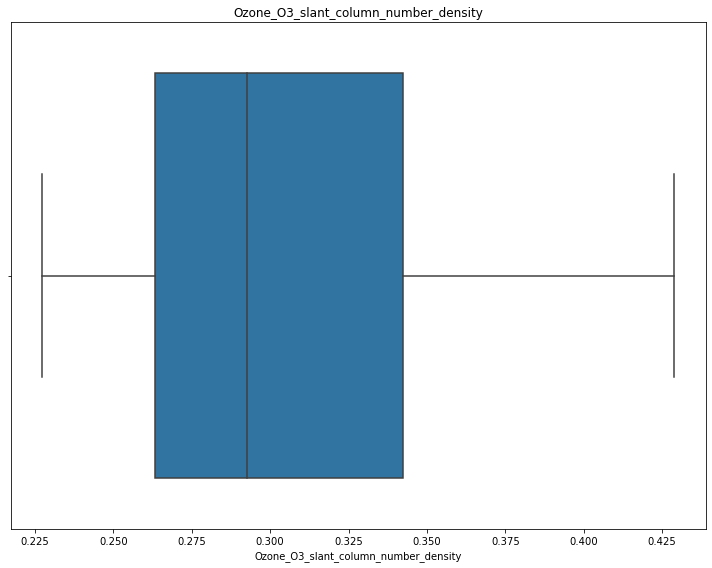

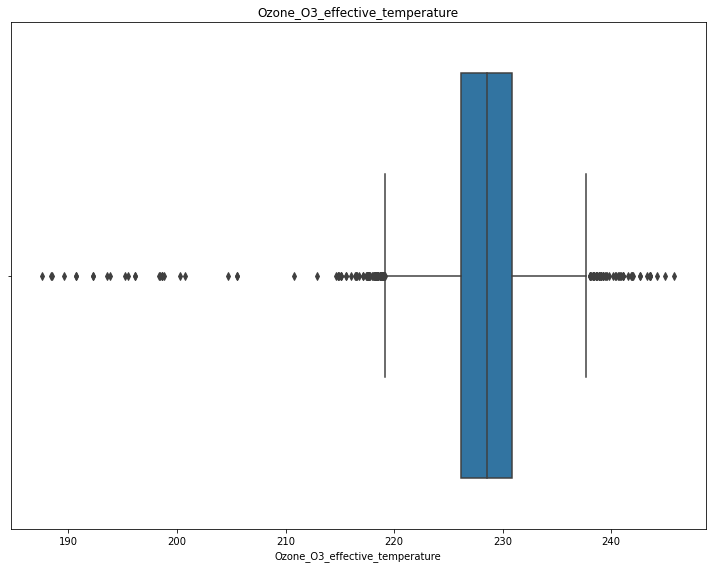

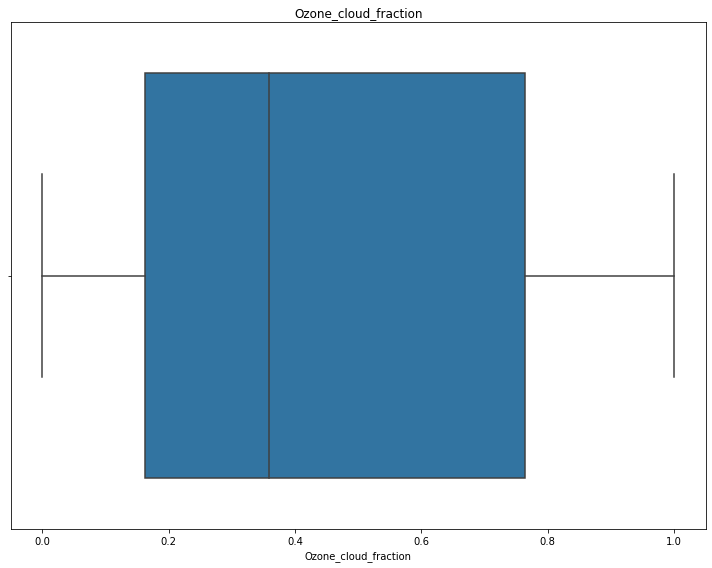

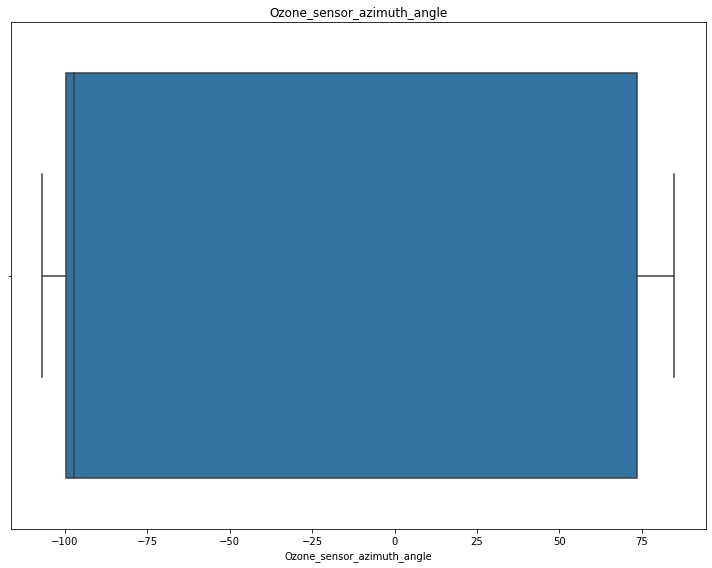

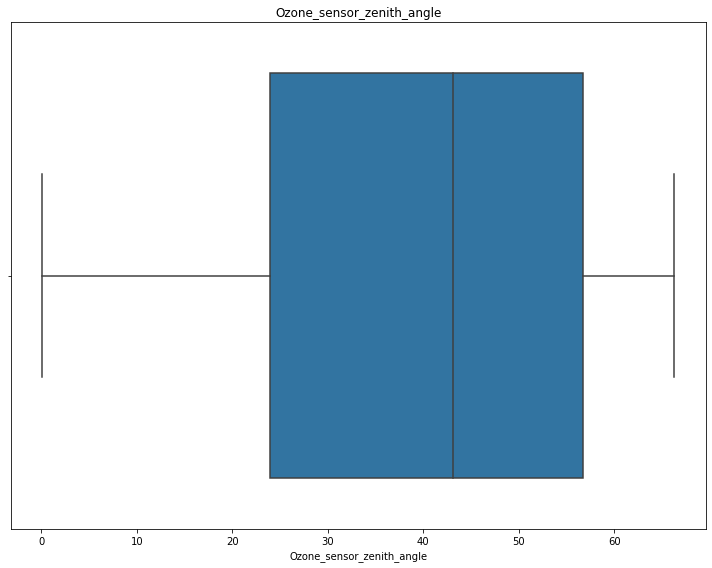

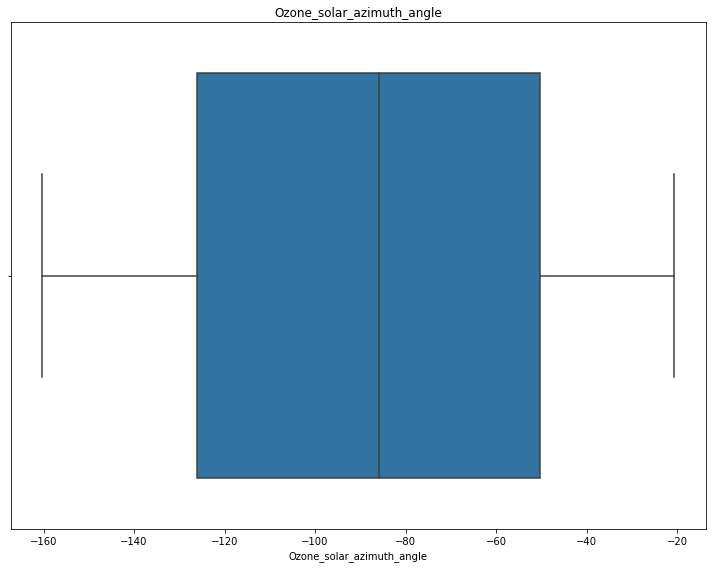

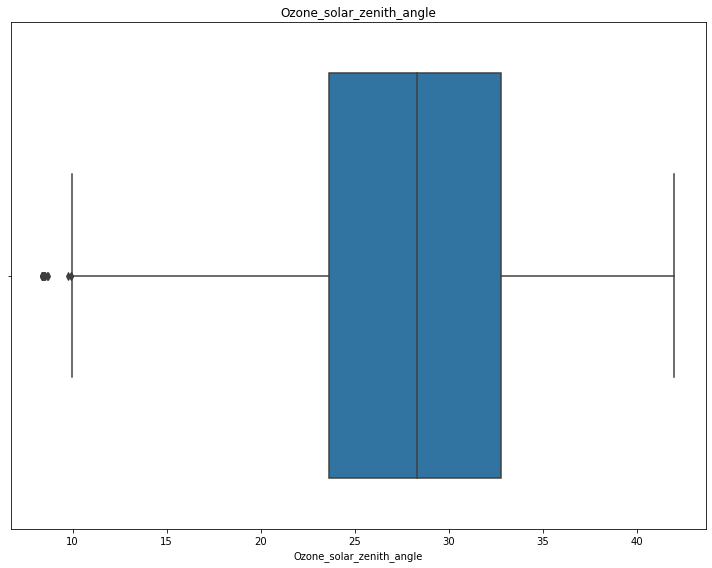

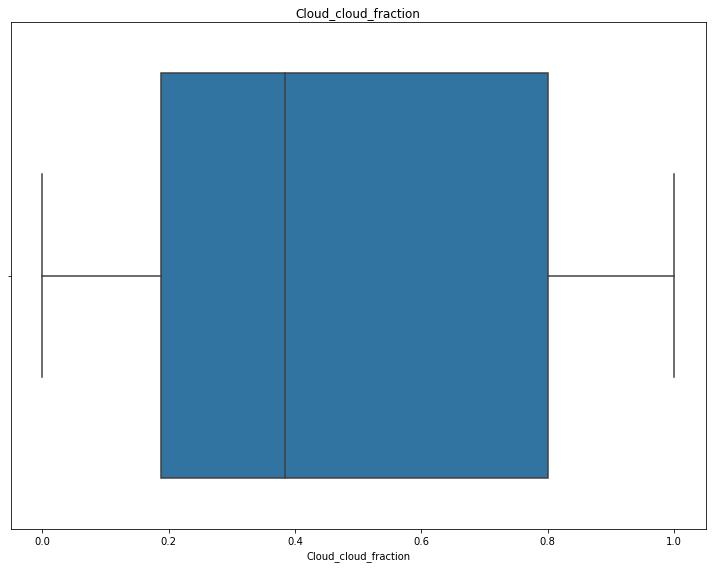

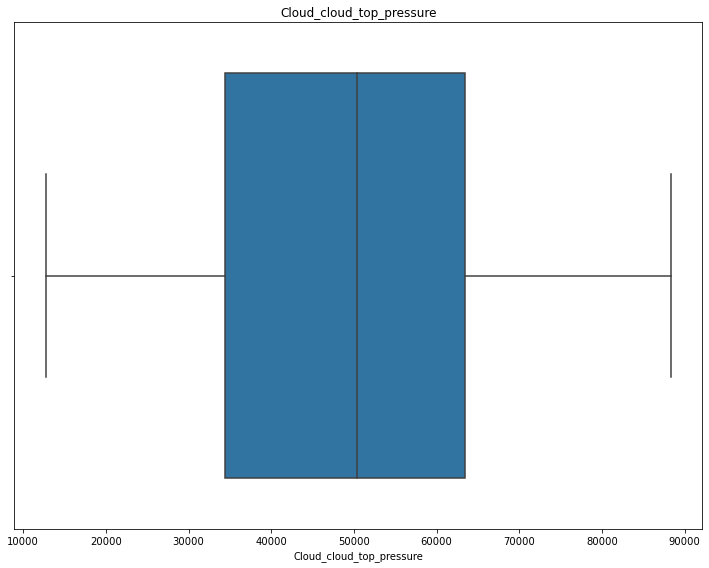

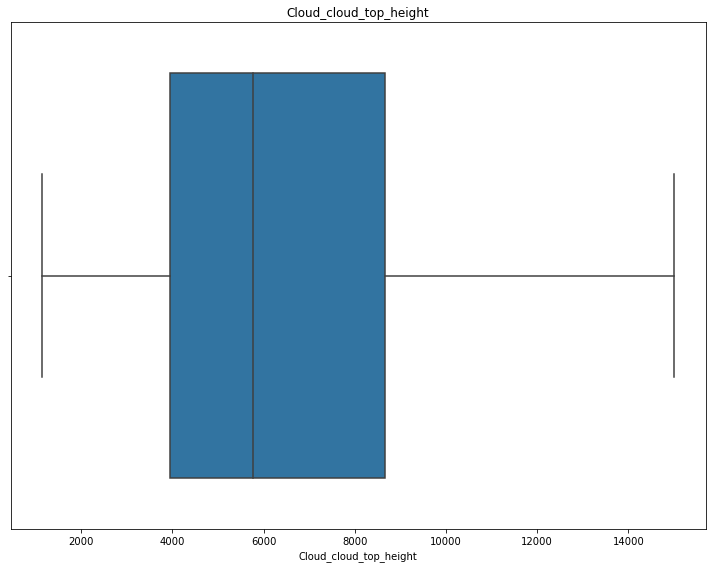

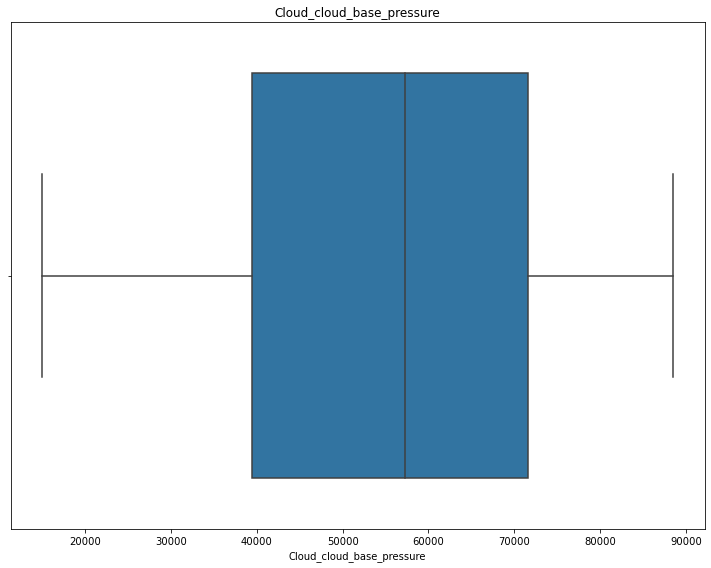

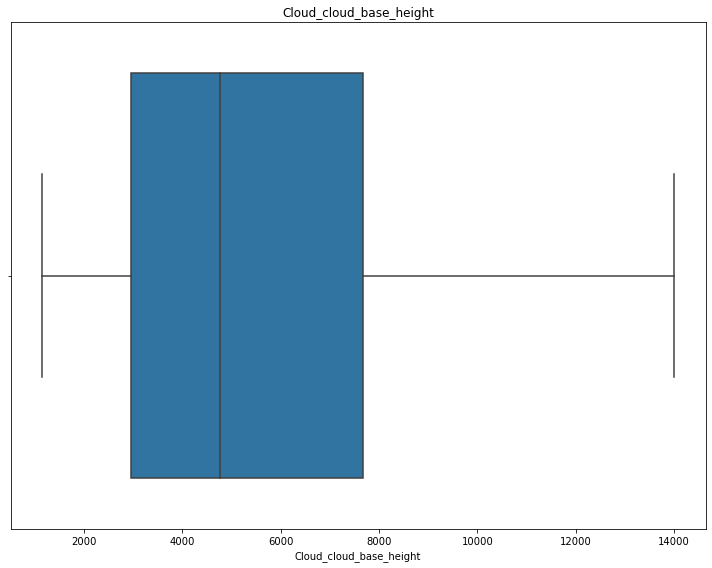

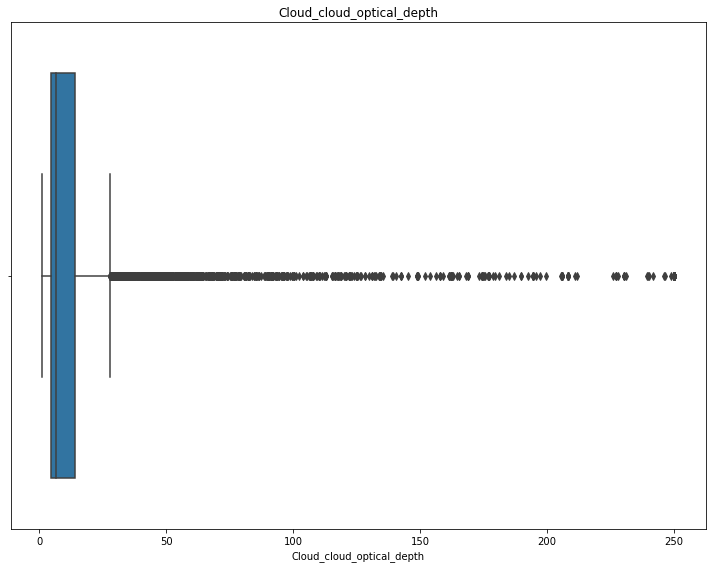

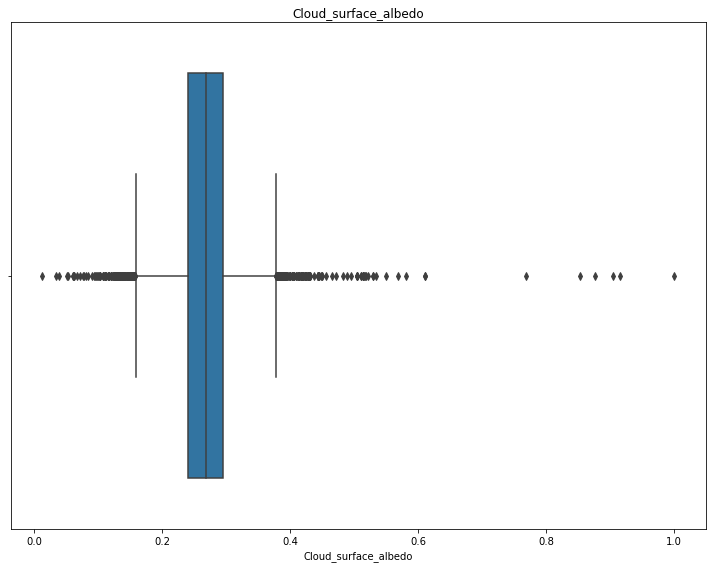

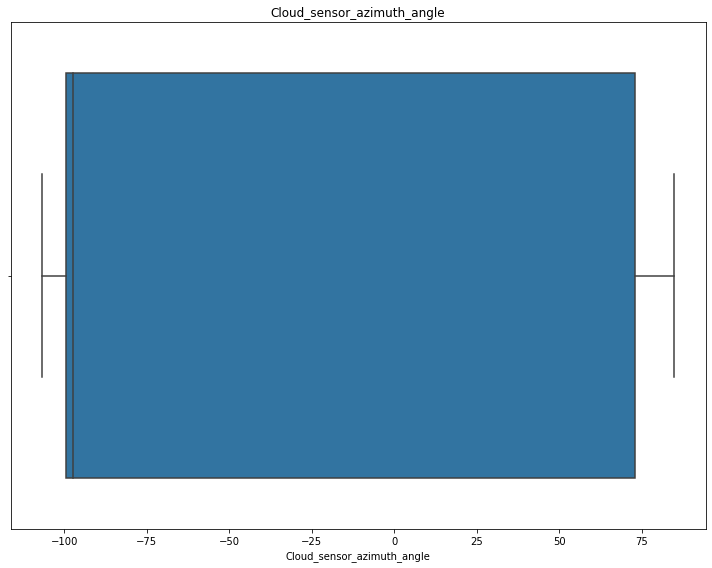

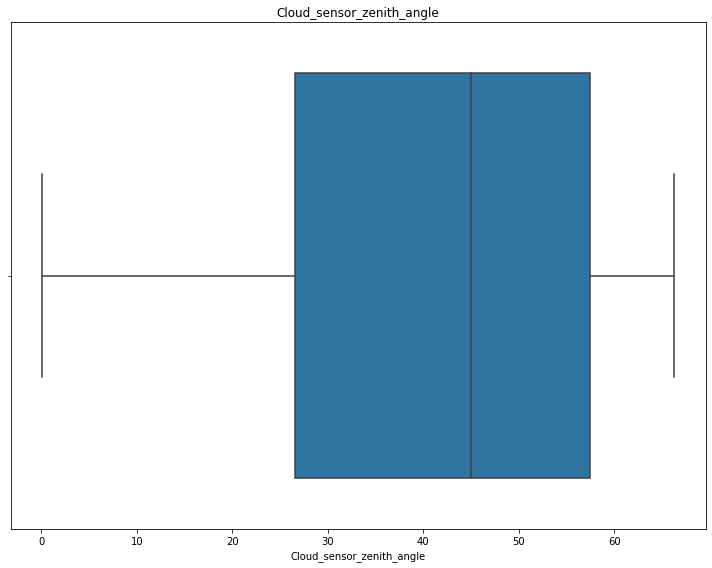

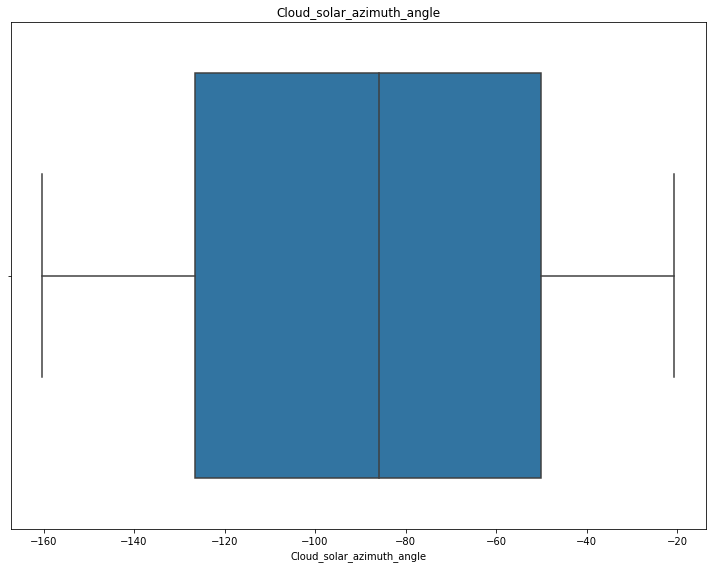

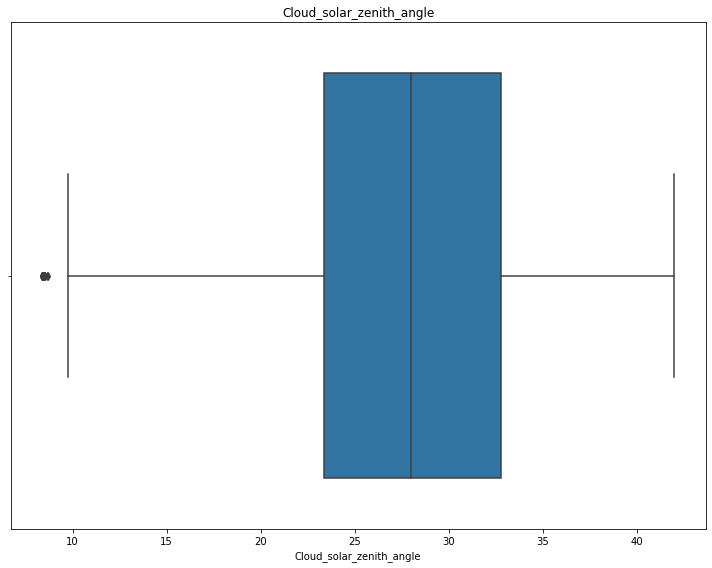

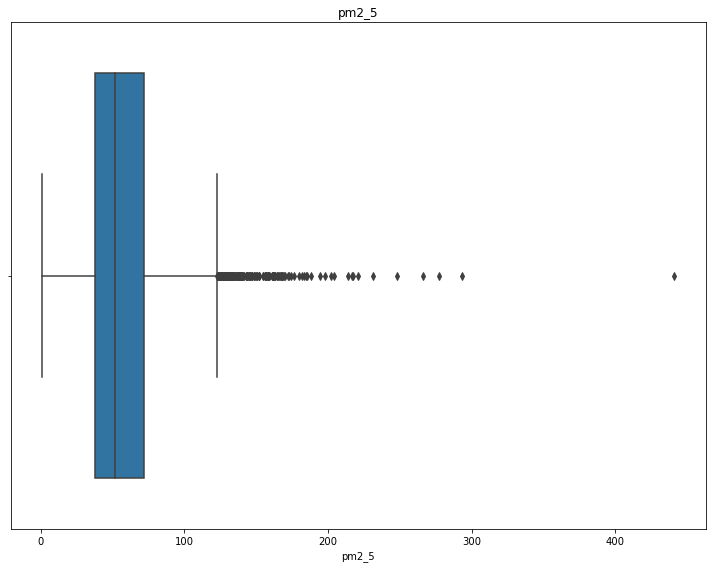

In [88]:
for col in numerical_cols:
    ax= sns.boxplot(x=col,data=train)
    plt.title(col)
    plt.tight_layout()
    plt.show()

a lot of outliers exist

In [94]:
train.to_csv('train_eda.csv',index=False)
test.to_csv('test_eda.csv',index=False)